# Final Experiment ran on 03_22_25 on subset 1 #2million+ samples of training dataset

# importing dataset and preparing it for training with Autogluon


In [1]:
# Importing libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing autogluon library
from autogluon.tabular import TabularDataset, TabularPredictor

# Parsing the S3 Data Location

In [3]:
# s3 bucket location
bucket = "final-praxis"
prefix = "Dataset/output-path/new-processed-data"

# loading dataset and output
train_data_s3_path = f"s3://{bucket}/{prefix}/training_subset1.csv"

test_data_s3_path  = f"s3://{bucket}/{prefix}/testing.csv"

test_data_no_label_s3_path = f"s3://{bucket}/{prefix}/testing_no_label.csv"

Validation_data_s3_path = f"s3://{bucket}/{prefix}/validation.csv"

# previewing the target feature columns
label = 'Label'

In [4]:
# importing training dataset 
train_data = TabularDataset(train_data_s3_path)


# previewing the target feature columns
label = 'Label'

# Importing the testing Dataset
test_data = TabularDataset(test_data_s3_path)

# ground truth
y_test = test_data[label]

# no target label test data
test_data_nolabel = TabularDataset(test_data_no_label_s3_path)

# importing validation_data

validation_data = TabularDataset(Validation_data_s3_path)


In [5]:
# data preview
train_data.shape

(2210607, 80)

In [6]:
train_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,112327,5,5,291,935,291,0,58.200000,130.139156,...,0.0,0.000000,0,0,0.0,0.000000,0,0,112327,DDoS-HOIC
1,6,2638121,10,9,1052,1525,581,0,105.200000,181.842911,...,0.0,0.000000,0,0,0.0,0.000000,0,0,2638121,Benign
2,6,116823375,17,26,820,21162,194,0,48.235294,74.251708,...,242641.5,63060.489853,287232,198051,58116437.5,228140.224775,58277757,57955118,116823375,Benign
3,6,131243,6,5,319,935,319,0,53.166667,130.231205,...,0.0,0.000000,0,0,0.0,0.000000,0,0,131243,DoS Hulk
4,6,5414997,5,4,20,964,20,0,4.000000,8.944272,...,0.0,0.000000,0,0,0.0,0.000000,0,0,5414997,DDoS-LOIC-HTTP


In [7]:
print("\nSummary of Label column: \n", train_data['Label'].value_counts())


Summary of Label column: 
 Benign                      750000
DoS Hulk                    721264
DDoS-HOIC                   432917
DDoS-LOIC-HTTP              115731
Botnet Ares                  57168
SSH-BruteForce               37679
DoS GoldenEye                25000
DDoS-LOIC-UDP                25000
DoS Slowloris                24995
Web Attack - XSS             10447
Web Attack - Brute Force     10406
Name: Label, dtype: int64


In [8]:
test_data.shape

(5415919, 80)

In [9]:
test_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,Benign
1,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,0.0,0.0,0,0,0.0,0.0,0,0,170385666,Benign
2,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,218096,Benign
3,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,0.0,0.0,0,0,0.0,0.0,0,0,1033,Benign
4,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,0.0,0.0,0,0,0.0,0.0,0,0,4238522,Benign


In [10]:
print("/nSummary of Label column: \n", test_data['Label'].value_counts())

/nSummary of Label column: 
 Benign                      5002433
DoS Hulk                     216379
DDoS-HOIC                    129875
DDoS-LOIC-HTTP                34720
Botnet Ares                   17150
SSH-BruteForce                11303
DoS GoldenEye                  2707
DoS Slowloris                  1019
DDoS-LOIC-UDP                   303
Web Attack - Brute Force         16
Web Attack - XSS                 14
Name: Label, dtype: int64


In [11]:
y_test.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [12]:
test_data_nolabel.shape

(5415919, 79)

In [13]:
test_data_nolabel.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
0,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
1,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,20,0.0,0.0,0,0,0.0,0.0,0,0,170385666
2,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,218096
3,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1033
4,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,20,0.0,0.0,0,0,0.0,0.0,0,0,4238522


In [14]:
validation_data.shape

(3610612, 80)

In [15]:
validation_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,117060497,35,29,2552,6419,405,0,72.914286,83.162977,...,374939.000000,420152.949886,672032,77846,5.811635e+07,232072.445585,58280453,57952253,117060497,Benign
1,6,117268395,16,18,1005,5592,362,0,62.812500,101.487746,...,327000.000000,241901.229844,498050,155950,5.822920e+07,370398.088335,58491106,57967284,117268395,Benign
2,6,61394552,15,14,667,3391,333,0,44.466667,99.398093,...,211008.666667,346886.613892,919088,69357,1.000984e+07,37887.430890,10031069,9936831,61394552,Benign
3,6,5117283,9,8,1308,2364,436,0,145.333333,218.000000,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,5117283,Benign
4,6,1700526,8,7,1144,1581,677,0,143.000000,227.969923,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1700526,Benign


In [16]:
print("/nSummary of Label column: \n", validation_data['Label'].value_counts())

/nSummary of Label column: 
 Benign                      3334954
DoS Hulk                     144253
DDoS-HOIC                     86584
DDoS-LOIC-HTTP                23146
Botnet Ares                   11434
SSH-BruteForce                 7536
DoS GoldenEye                  1805
DoS Slowloris                   679
DDoS-LOIC-UDP                   202
Web Attack - Brute Force         10
Web Attack - XSS                  9
Name: Label, dtype: int64


## Fitting Autogluon Model

In [25]:
# setting up parameters and fitting the predictor with training and validation data
time_limit = 18000  # train various models for ~5 hrs
metric = 'balanced_accuracy'  # evaluation metric
sample_weight = 'balance_weight'

predictor = TabularPredictor(label=label, eval_metric=metric, sample_weight=sample_weight,).fit(
    train_data=train_data,
    tuning_data=validation_data,
    use_bag_holdout=True,
    time_limit=time_limit,
    presets=['best_quality'],
    verbosity =4,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250322_140124/"
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True, 'use_bag_holdout': True, 'verbosity': 4}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'calibrate': 'auto',
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'feature_prune_kwargs': None,
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'included_model_types': None,
 'keep_only_best': False,
 'name_suffix': None,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'pseudo_data': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': True,
 'verbosity': 4}
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Saving

[1]	valid_set's multi_logloss: 1.91505	valid_set's balanced_accuracy: 0.089316
[2]	valid_set's multi_logloss: 1.62174	valid_set's balanced_accuracy: 0.0930734
[3]	valid_set's multi_logloss: 1.40456	valid_set's balanced_accuracy: 0.0916847
[4]	valid_set's multi_logloss: 1.2339	valid_set's balanced_accuracy: 0.0920068
[5]	valid_set's multi_logloss: 1.09413	valid_set's balanced_accuracy: 0.0918093
[6]	valid_set's multi_logloss: 0.975799	valid_set's balanced_accuracy: 0.0912255
[7]	valid_set's multi_logloss: 0.874087	valid_set's balanced_accuracy: 0.0915876
[8]	valid_set's multi_logloss: 0.786089	valid_set's balanced_accuracy: 0.0916227
[9]	valid_set's multi_logloss: 0.708431	valid_set's balanced_accuracy: 0.091374
[10]	valid_set's multi_logloss: 0.640196	valid_set's balanced_accuracy: 0.0911281
[11]	valid_set's multi_logloss: 0.57938	valid_set's balanced_accuracy: 0.0912586
[12]	valid_set's multi_logloss: 0.526149	valid_set's balanced_accuracy: 0.0911525
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91597	valid_set's balanced_accuracy: 0.0919386
[2]	valid_set's multi_logloss: 1.62076	valid_set's balanced_accuracy: 0.0915884
[3]	valid_set's multi_logloss: 1.40427	valid_set's balanced_accuracy: 0.0902299
[4]	valid_set's multi_logloss: 1.23377	valid_set's balanced_accuracy: 0.090948
[5]	valid_set's multi_logloss: 1.0938	valid_set's balanced_accuracy: 0.0904194
[6]	valid_set's multi_logloss: 0.975661	valid_set's balanced_accuracy: 0.0908514
[7]	valid_set's multi_logloss: 0.874145	valid_set's balanced_accuracy: 0.0912729
[8]	valid_set's multi_logloss: 0.787887	valid_set's balanced_accuracy: 0.0909861
[9]	valid_set's multi_logloss: 0.710257	valid_set's balanced_accuracy: 0.0913053
[10]	valid_set's multi_logloss: 0.641734	valid_set's balanced_accuracy: 0.0912959
[11]	valid_set's multi_logloss: 0.581153	valid_set's balanced_accuracy: 0.0918561
[12]	valid_set's multi_logloss: 0.526478	valid_set's balanced_accuracy: 0.0919081
[13]	valid_set's multi_logloss: 

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91735	valid_set's balanced_accuracy: 0.0923098
[2]	valid_set's multi_logloss: 1.62151	valid_set's balanced_accuracy: 0.0923226
[3]	valid_set's multi_logloss: 1.40539	valid_set's balanced_accuracy: 0.0921879
[4]	valid_set's multi_logloss: 1.23472	valid_set's balanced_accuracy: 0.0919048
[5]	valid_set's multi_logloss: 1.09424	valid_set's balanced_accuracy: 0.0920584
[6]	valid_set's multi_logloss: 0.978661	valid_set's balanced_accuracy: 0.0914493
[7]	valid_set's multi_logloss: 0.877325	valid_set's balanced_accuracy: 0.0912764
[8]	valid_set's multi_logloss: 0.788716	valid_set's balanced_accuracy: 0.0914245
[9]	valid_set's multi_logloss: 0.710908	valid_set's balanced_accuracy: 0.0911026
[10]	valid_set's multi_logloss: 0.642154	valid_set's balanced_accuracy: 0.0911596
[11]	valid_set's multi_logloss: 0.581153	valid_set's balanced_accuracy: 0.090993
[12]	valid_set's multi_logloss: 0.526567	valid_set's balanced_accuracy: 0.0909219
[13]	valid_set's multi_logloss:

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.9147	valid_set's balanced_accuracy: 0.089087
[2]	valid_set's multi_logloss: 1.61901	valid_set's balanced_accuracy: 0.0889255
[3]	valid_set's multi_logloss: 1.40299	valid_set's balanced_accuracy: 0.0890542
[4]	valid_set's multi_logloss: 1.23292	valid_set's balanced_accuracy: 0.0888999
[5]	valid_set's multi_logloss: 1.0926	valid_set's balanced_accuracy: 0.0889818
[6]	valid_set's multi_logloss: 0.974344	valid_set's balanced_accuracy: 0.0884741
[7]	valid_set's multi_logloss: 0.872796	valid_set's balanced_accuracy: 0.0884822
[8]	valid_set's multi_logloss: 0.784853	valid_set's balanced_accuracy: 0.0885907
[9]	valid_set's multi_logloss: 0.707815	valid_set's balanced_accuracy: 0.0884919
[10]	valid_set's multi_logloss: 0.63952	valid_set's balanced_accuracy: 0.0885691
[11]	valid_set's multi_logloss: 0.578734	valid_set's balanced_accuracy: 0.0885149
[12]	valid_set's multi_logloss: 0.52447	valid_set's balanced_accuracy: 0.0881737
[13]	valid_set's multi_logloss: 0.4

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91871	valid_set's balanced_accuracy: 0.0931663
[2]	valid_set's multi_logloss: 1.62281	valid_set's balanced_accuracy: 0.0935258
[3]	valid_set's multi_logloss: 1.41162	valid_set's balanced_accuracy: 0.0931899
[4]	valid_set's multi_logloss: 1.24151	valid_set's balanced_accuracy: 0.0937607
[5]	valid_set's multi_logloss: 1.10071	valid_set's balanced_accuracy: 0.0929039
[6]	valid_set's multi_logloss: 0.981775	valid_set's balanced_accuracy: 0.0927105
[7]	valid_set's multi_logloss: 0.879231	valid_set's balanced_accuracy: 0.0928527
[8]	valid_set's multi_logloss: 0.790885	valid_set's balanced_accuracy: 0.0924933
[9]	valid_set's multi_logloss: 0.712831	valid_set's balanced_accuracy: 0.0925079
[10]	valid_set's multi_logloss: 0.643974	valid_set's balanced_accuracy: 0.0922289
[11]	valid_set's multi_logloss: 0.582785	valid_set's balanced_accuracy: 0.0923579
[12]	valid_set's multi_logloss: 0.528024	valid_set's balanced_accuracy: 0.0924929
[13]	valid_set's multi_logloss

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.93518	valid_set's balanced_accuracy: 0.092155
[2]	valid_set's multi_logloss: 1.65081	valid_set's balanced_accuracy: 0.0919363
[3]	valid_set's multi_logloss: 1.42821	valid_set's balanced_accuracy: 0.0916961
[4]	valid_set's multi_logloss: 1.25271	valid_set's balanced_accuracy: 0.0913899
[5]	valid_set's multi_logloss: 1.10891	valid_set's balanced_accuracy: 0.0922398
[6]	valid_set's multi_logloss: 0.988311	valid_set's balanced_accuracy: 0.0929766
[7]	valid_set's multi_logloss: 0.88495	valid_set's balanced_accuracy: 0.0924612
[8]	valid_set's multi_logloss: 0.797413	valid_set's balanced_accuracy: 0.0922324
[9]	valid_set's multi_logloss: 0.718496	valid_set's balanced_accuracy: 0.0921032
[10]	valid_set's multi_logloss: 0.652812	valid_set's balanced_accuracy: 0.0919655
[11]	valid_set's multi_logloss: 0.592747	valid_set's balanced_accuracy: 0.0917488
[12]	valid_set's multi_logloss: 0.53691	valid_set's balanced_accuracy: 0.0919939
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91554	valid_set's balanced_accuracy: 0.0929082
[2]	valid_set's multi_logloss: 1.61955	valid_set's balanced_accuracy: 0.0934374
[3]	valid_set's multi_logloss: 1.40342	valid_set's balanced_accuracy: 0.0930849
[4]	valid_set's multi_logloss: 1.23647	valid_set's balanced_accuracy: 0.0922195
[5]	valid_set's multi_logloss: 1.0957	valid_set's balanced_accuracy: 0.0917431
[6]	valid_set's multi_logloss: 0.977488	valid_set's balanced_accuracy: 0.0918089
[7]	valid_set's multi_logloss: 0.877194	valid_set's balanced_accuracy: 0.0914468
[8]	valid_set's multi_logloss: 0.788545	valid_set's balanced_accuracy: 0.0918209
[9]	valid_set's multi_logloss: 0.710651	valid_set's balanced_accuracy: 0.0915425
[10]	valid_set's multi_logloss: 0.64191	valid_set's balanced_accuracy: 0.0911488
[11]	valid_set's multi_logloss: 0.580794	valid_set's balanced_accuracy: 0.091514
[12]	valid_set's multi_logloss: 0.526157	valid_set's balanced_accuracy: 0.0914188
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91381	valid_set's balanced_accuracy: 0.0908455
[2]	valid_set's multi_logloss: 1.6196	valid_set's balanced_accuracy: 0.0922417
[3]	valid_set's multi_logloss: 1.4029	valid_set's balanced_accuracy: 0.092249
[4]	valid_set's multi_logloss: 1.23257	valid_set's balanced_accuracy: 0.0915341
[5]	valid_set's multi_logloss: 1.0953	valid_set's balanced_accuracy: 0.0916778
[6]	valid_set's multi_logloss: 0.979352	valid_set's balanced_accuracy: 0.0916398
[7]	valid_set's multi_logloss: 0.87726	valid_set's balanced_accuracy: 0.0918103
[8]	valid_set's multi_logloss: 0.78864	valid_set's balanced_accuracy: 0.0921965
[9]	valid_set's multi_logloss: 0.711756	valid_set's balanced_accuracy: 0.0921617
[10]	valid_set's multi_logloss: 0.643025	valid_set's balanced_accuracy: 0.0920394
[11]	valid_set's multi_logloss: 0.581865	valid_set's balanced_accuracy: 0.0921698
[12]	valid_set's multi_logloss: 0.528553	valid_set's balanced_accuracy: 0.0918927
[13]	valid_set's multi_logloss: 0.47

Saving AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/utils/oof.pkl
Saving AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Saving AutogluonModels/ag-20250322_140124/utils/attr/LightGBMXT_BAG_L1/y_pred_proba_val.pkl
	0.9998	 = Validation score   (balanced_accuracy)
	112.59s	 = Training   runtime
	1.4s	 = Validation runtime
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl
Fitting model: LightGBM_BAG_L1 ... Training model for up to 2299.28s of the 8291.04s of remaining time.
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Dropped 1 of 79 features.
	Fitting LightGBM_BAG_L1 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/utils/model_template.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/utils/model_template.pkl
Upper level total_num_cpus, num_gpus 96 | 0
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
m

[1]	valid_set's multi_logloss: 1.91329	valid_set's balanced_accuracy: 0.0898447
[2]	valid_set's multi_logloss: 1.61766	valid_set's balanced_accuracy: 0.091085
[3]	valid_set's multi_logloss: 1.40117	valid_set's balanced_accuracy: 0.0908092
[4]	valid_set's multi_logloss: 1.2306	valid_set's balanced_accuracy: 0.0908119
[5]	valid_set's multi_logloss: 1.09053	valid_set's balanced_accuracy: 0.0906281
[6]	valid_set's multi_logloss: 0.972492	valid_set's balanced_accuracy: 0.0907303
[7]	valid_set's multi_logloss: 0.871193	valid_set's balanced_accuracy: 0.0903113
[8]	valid_set's multi_logloss: 0.783127	valid_set's balanced_accuracy: 0.0903129
[9]	valid_set's multi_logloss: 0.705881	valid_set's balanced_accuracy: 0.0903643
[10]	valid_set's multi_logloss: 0.637608	valid_set's balanced_accuracy: 0.0906342
[11]	valid_set's multi_logloss: 0.576932	valid_set's balanced_accuracy: 0.0907734
[12]	valid_set's multi_logloss: 0.52275	valid_set's balanced_accuracy: 0.0907559
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91321	valid_set's balanced_accuracy: 0.0914093
[2]	valid_set's multi_logloss: 1.61764	valid_set's balanced_accuracy: 0.0905846
[3]	valid_set's multi_logloss: 1.40117	valid_set's balanced_accuracy: 0.0913026
[4]	valid_set's multi_logloss: 1.23059	valid_set's balanced_accuracy: 0.0910085
[5]	valid_set's multi_logloss: 1.09054	valid_set's balanced_accuracy: 0.0908605
[6]	valid_set's multi_logloss: 0.972518	valid_set's balanced_accuracy: 0.0907052
[7]	valid_set's multi_logloss: 0.871244	valid_set's balanced_accuracy: 0.0901782
[8]	valid_set's multi_logloss: 0.783192	valid_set's balanced_accuracy: 0.0902999
[9]	valid_set's multi_logloss: 0.705961	valid_set's balanced_accuracy: 0.0903631
[10]	valid_set's multi_logloss: 0.637704	valid_set's balanced_accuracy: 0.0904105
[11]	valid_set's multi_logloss: 0.577042	valid_set's balanced_accuracy: 0.0905288
[12]	valid_set's multi_logloss: 0.522876	valid_set's balanced_accuracy: 0.0905621
[13]	valid_set's multi_logloss

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.9132	valid_set's balanced_accuracy: 0.0930827
[2]	valid_set's multi_logloss: 1.61765	valid_set's balanced_accuracy: 0.0927303
[3]	valid_set's multi_logloss: 1.40117	valid_set's balanced_accuracy: 0.0928763
[4]	valid_set's multi_logloss: 1.23058	valid_set's balanced_accuracy: 0.0925594
[5]	valid_set's multi_logloss: 1.09052	valid_set's balanced_accuracy: 0.0923167
[6]	valid_set's multi_logloss: 0.972483	valid_set's balanced_accuracy: 0.0924992
[7]	valid_set's multi_logloss: 0.871187	valid_set's balanced_accuracy: 0.0928507
[8]	valid_set's multi_logloss: 0.783114	valid_set's balanced_accuracy: 0.0927312
[9]	valid_set's multi_logloss: 0.705865	valid_set's balanced_accuracy: 0.0924197
[10]	valid_set's multi_logloss: 0.63759	valid_set's balanced_accuracy: 0.0923703
[11]	valid_set's multi_logloss: 0.576906	valid_set's balanced_accuracy: 0.0921877
[12]	valid_set's multi_logloss: 0.522738	valid_set's balanced_accuracy: 0.0923759
[13]	valid_set's multi_logloss: 

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91321	valid_set's balanced_accuracy: 0.0905955
[2]	valid_set's multi_logloss: 1.61767	valid_set's balanced_accuracy: 0.0905657
[3]	valid_set's multi_logloss: 1.40122	valid_set's balanced_accuracy: 0.0903767
[4]	valid_set's multi_logloss: 1.23064	valid_set's balanced_accuracy: 0.0902825
[5]	valid_set's multi_logloss: 1.09058	valid_set's balanced_accuracy: 0.0902105
[6]	valid_set's multi_logloss: 0.972553	valid_set's balanced_accuracy: 0.0903307
[7]	valid_set's multi_logloss: 0.87128	valid_set's balanced_accuracy: 0.0911349
[8]	valid_set's multi_logloss: 0.783284	valid_set's balanced_accuracy: 0.0911507
[9]	valid_set's multi_logloss: 0.706014	valid_set's balanced_accuracy: 0.091241
[10]	valid_set's multi_logloss: 0.637734	valid_set's balanced_accuracy: 0.0912328
[11]	valid_set's multi_logloss: 0.577052	valid_set's balanced_accuracy: 0.0912783
[12]	valid_set's multi_logloss: 0.522882	valid_set's balanced_accuracy: 0.0914417
[13]	valid_set's multi_logloss: 

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91324	valid_set's balanced_accuracy: 0.0922681
[2]	valid_set's multi_logloss: 1.61764	valid_set's balanced_accuracy: 0.0922929
[3]	valid_set's multi_logloss: 1.40119	valid_set's balanced_accuracy: 0.0923797
[4]	valid_set's multi_logloss: 1.23061	valid_set's balanced_accuracy: 0.0925582
[5]	valid_set's multi_logloss: 1.09055	valid_set's balanced_accuracy: 0.0926857
[6]	valid_set's multi_logloss: 0.972516	valid_set's balanced_accuracy: 0.0926203
[7]	valid_set's multi_logloss: 0.871238	valid_set's balanced_accuracy: 0.0921642
[8]	valid_set's multi_logloss: 0.783183	valid_set's balanced_accuracy: 0.0917686
[9]	valid_set's multi_logloss: 0.705942	valid_set's balanced_accuracy: 0.0917963
[10]	valid_set's multi_logloss: 0.637681	valid_set's balanced_accuracy: 0.0920645
[11]	valid_set's multi_logloss: 0.577	valid_set's balanced_accuracy: 0.0920594
[12]	valid_set's multi_logloss: 0.522833	valid_set's balanced_accuracy: 0.0919965
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91312	valid_set's balanced_accuracy: 0.0918049
[2]	valid_set's multi_logloss: 1.61761	valid_set's balanced_accuracy: 0.0917967
[3]	valid_set's multi_logloss: 1.40106	valid_set's balanced_accuracy: 0.0919712
[4]	valid_set's multi_logloss: 1.23042	valid_set's balanced_accuracy: 0.0920345
[5]	valid_set's multi_logloss: 1.09039	valid_set's balanced_accuracy: 0.0917877
[6]	valid_set's multi_logloss: 0.972369	valid_set's balanced_accuracy: 0.091619
[7]	valid_set's multi_logloss: 0.8711	valid_set's balanced_accuracy: 0.0914955
[8]	valid_set's multi_logloss: 0.783041	valid_set's balanced_accuracy: 0.0916852
[9]	valid_set's multi_logloss: 0.705801	valid_set's balanced_accuracy: 0.0917694
[10]	valid_set's multi_logloss: 0.637526	valid_set's balanced_accuracy: 0.0916519
[11]	valid_set's multi_logloss: 0.576851	valid_set's balanced_accuracy: 0.0918661
[12]	valid_set's multi_logloss: 0.52269	valid_set's balanced_accuracy: 0.0914016
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91322	valid_set's balanced_accuracy: 0.092549
[2]	valid_set's multi_logloss: 1.61765	valid_set's balanced_accuracy: 0.0927271
[3]	valid_set's multi_logloss: 1.40118	valid_set's balanced_accuracy: 0.092615
[4]	valid_set's multi_logloss: 1.23061	valid_set's balanced_accuracy: 0.092573
[5]	valid_set's multi_logloss: 1.09054	valid_set's balanced_accuracy: 0.0926115
[6]	valid_set's multi_logloss: 0.972496	valid_set's balanced_accuracy: 0.092578
[7]	valid_set's multi_logloss: 0.871204	valid_set's balanced_accuracy: 0.0928839
[8]	valid_set's multi_logloss: 0.783135	valid_set's balanced_accuracy: 0.0929189
[9]	valid_set's multi_logloss: 0.705878	valid_set's balanced_accuracy: 0.0930873
[10]	valid_set's multi_logloss: 0.637609	valid_set's balanced_accuracy: 0.092956
[11]	valid_set's multi_logloss: 0.576925	valid_set's balanced_accuracy: 0.0929311
[12]	valid_set's multi_logloss: 0.522767	valid_set's balanced_accuracy: 0.0928755
[13]	valid_set's multi_logloss: 0.4

	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91321	valid_set's balanced_accuracy: 0.0922122
[2]	valid_set's multi_logloss: 1.61765	valid_set's balanced_accuracy: 0.0916706
[3]	valid_set's multi_logloss: 1.40118	valid_set's balanced_accuracy: 0.0915325
[4]	valid_set's multi_logloss: 1.2306	valid_set's balanced_accuracy: 0.0914423
[5]	valid_set's multi_logloss: 1.09055	valid_set's balanced_accuracy: 0.0912516
[6]	valid_set's multi_logloss: 0.972509	valid_set's balanced_accuracy: 0.0909245
[7]	valid_set's multi_logloss: 0.871216	valid_set's balanced_accuracy: 0.0912592
[8]	valid_set's multi_logloss: 0.783153	valid_set's balanced_accuracy: 0.0912936
[9]	valid_set's multi_logloss: 0.705899	valid_set's balanced_accuracy: 0.0913512
[10]	valid_set's multi_logloss: 0.637631	valid_set's balanced_accuracy: 0.0913602
[11]	valid_set's multi_logloss: 0.576948	valid_set's balanced_accuracy: 0.0914122
[12]	valid_set's multi_logloss: 0.52278	valid_set's balanced_accuracy: 0.0914244
[13]	valid_set's multi_logloss: 

Saving AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/utils/oof.pkl
Saving AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Saving AutogluonModels/ag-20250322_140124/utils/attr/LightGBM_BAG_L1/y_pred_proba_val.pkl
	0.9998	 = Validation score   (balanced_accuracy)
	99.77s	 = Training   runtime
	1.32s	 = Validation runtime
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 2180.19s of the 8171.94s of remaining time.
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Dropped 1 of 79 features.
	Fitting RandomForestGini_BAG_L1 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/utils/model_template.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/utils/model_template.pkl
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	989.33s	= Estimate

0:	learn: 1.9295131	test: 1.9292859	best: 1.9292859 (0)	total: 732ms	remaining: 2h 1m 57s
1:	learn: 1.6988049	test: 1.6984771	best: 1.6984771 (1)	total: 1.44s	remaining: 2h 15s
2:	learn: 1.4911272	test: 1.4907372	best: 1.4907372 (2)	total: 2.13s	remaining: 1h 58m 23s
3:	learn: 1.3304500	test: 1.3300297	best: 1.3300297 (3)	total: 2.74s	remaining: 1h 54m 12s
4:	learn: 1.1997614	test: 1.1994206	best: 1.1994206 (4)	total: 3.34s	remaining: 1h 51m 25s
5:	learn: 1.1093139	test: 1.1090606	best: 1.1090606 (5)	total: 4.11s	remaining: 1h 53m 59s
6:	learn: 1.0170821	test: 1.0168701	best: 1.0168701 (6)	total: 4.75s	remaining: 1h 52m 56s
7:	learn: 0.9446623	test: 0.9444167	best: 0.9444167 (7)	total: 5.39s	remaining: 1h 52m 14s
8:	learn: 0.8751647	test: 0.8749499	best: 0.8749499 (8)	total: 6.02s	remaining: 1h 51m 20s
9:	learn: 0.8093459	test: 0.8090432	best: 0.8090432 (9)	total: 6.6s	remaining: 1h 49m 53s
10:	learn: 0.7531337	test: 0.7528455	best: 0.7528455 (10)	total: 7.24s	remaining: 1h 49m 35s
11:

	Ran out of time, early stopping on iteration 258.


257:	learn: 0.0002531	test: 0.0002422	best: 0.0002422 (257)	total: 2m 58s	remaining: 1h 52m 10s

bestTest = 0.0002422227065
bestIteration = 257

Shrink model to first 258 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.0678416	test: 2.0678177	best: 2.0678177 (0)	total: 791ms	remaining: 2h 11m 44s
1:	learn: 1.7525398	test: 1.7525436	best: 1.7525436 (1)	total: 1.48s	remaining: 2h 2m 55s
2:	learn: 1.5414125	test: 1.5413847	best: 1.5413847 (2)	total: 2.13s	remaining: 1h 58m 37s
3:	learn: 1.3878719	test: 1.3878569	best: 1.3878569 (3)	total: 2.8s	remaining: 1h 56m 45s
4:	learn: 1.2487474	test: 1.2487583	best: 1.2487583 (4)	total: 3.38s	remaining: 1h 52m 48s
5:	learn: 1.1373970	test: 1.1373919	best: 1.1373919 (5)	total: 3.96s	remaining: 1h 50m 5s
6:	learn: 1.0436760	test: 1.0436759	best: 1.0436759 (6)	total: 4.63s	remaining: 1h 50m 7s
7:	learn: 0.9598990	test: 0.9597978	best: 0.9597978 (7)	total: 5.24s	remaining: 1h 49m 7s
8:	learn: 0.8846731	test: 0.8845693	best: 0.8845693 (8)	total: 5.82s	remaining: 1h 47m 45s
9:	learn: 0.8181381	test: 0.8180040	best: 0.8180040 (9)	total: 6.4s	remaining: 1h 46m 32s
10:	learn: 0.7617179	test: 0.7615717	best: 0.7615717 (10)	total: 7.03s	remaining: 1h 46m 24s
11:

	Ran out of time, early stopping on iteration 277.


276:	learn: 0.0002128	test: 0.0002032	best: 0.0002032 (276)	total: 3m 11s	remaining: 1h 52m 5s

bestTest = 0.0002032067954
bestIteration = 276

Shrink model to first 277 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9289033	test: 1.9290382	best: 1.9290382 (0)	total: 698ms	remaining: 1h 56m 20s
1:	learn: 1.6549164	test: 1.6553224	best: 1.6553224 (1)	total: 1.37s	remaining: 1h 54m 16s
2:	learn: 1.4568925	test: 1.4573660	best: 1.4573660 (2)	total: 2.08s	remaining: 1h 55m 43s
3:	learn: 1.3126355	test: 1.3131160	best: 1.3131160 (3)	total: 2.72s	remaining: 1h 53m 18s
4:	learn: 1.1851784	test: 1.1855705	best: 1.1855705 (4)	total: 3.35s	remaining: 1h 51m 30s
5:	learn: 1.0838609	test: 1.0841627	best: 1.0841627 (5)	total: 4.05s	remaining: 1h 52m 28s
6:	learn: 1.0066083	test: 1.0069548	best: 1.0069548 (6)	total: 4.8s	remaining: 1h 54m 8s
7:	learn: 0.9243700	test: 0.9248092	best: 0.9248092 (7)	total: 5.36s	remaining: 1h 51m 30s
8:	learn: 0.8533983	test: 0.8538064	best: 0.8538064 (8)	total: 6.02s	remaining: 1h 51m 21s
9:	learn: 0.7907058	test: 0.7910694	best: 0.7910694 (9)	total: 6.62s	remaining: 1h 50m 15s
10:	learn: 0.7358064	test: 0.7362163	best: 0.7362163 (10)	total: 7.25s	remaining: 1h 49m 44s

	Ran out of time, early stopping on iteration 288.


287:	learn: 0.0002028	test: 0.0001921	best: 0.0001921 (287)	total: 3m 17s	remaining: 1h 51m 16s

bestTest = 0.0001920528255
bestIteration = 287

Shrink model to first 288 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9272903	test: 1.9279162	best: 1.9279162 (0)	total: 698ms	remaining: 1h 56m 16s
1:	learn: 1.7434167	test: 1.7440147	best: 1.7440147 (1)	total: 1.46s	remaining: 2h 1m 45s
2:	learn: 1.5217759	test: 1.5225056	best: 1.5225056 (2)	total: 2.16s	remaining: 1h 59m 56s
3:	learn: 1.4106155	test: 1.4114234	best: 1.4114234 (3)	total: 2.92s	remaining: 2h 1m 26s
4:	learn: 1.2636861	test: 1.2645008	best: 1.2645008 (4)	total: 3.52s	remaining: 1h 57m 25s
5:	learn: 1.1416869	test: 1.1425284	best: 1.1425284 (5)	total: 4.12s	remaining: 1h 54m 19s
6:	learn: 1.0399931	test: 1.0408017	best: 1.0408017 (6)	total: 4.69s	remaining: 1h 51m 42s
7:	learn: 0.9529816	test: 0.9537728	best: 0.9537728 (7)	total: 5.3s	remaining: 1h 50m 15s
8:	learn: 0.8770584	test: 0.8778766	best: 0.8778766 (8)	total: 5.94s	remaining: 1h 49m 50s
9:	learn: 0.8103892	test: 0.8112090	best: 0.8112090 (9)	total: 6.59s	remaining: 1h 49m 43s
10:	learn: 0.7513195	test: 0.7521670	best: 0.7521670 (10)	total: 7.22s	remaining: 1h 49m 20s


	Ran out of time, early stopping on iteration 301.


300:	learn: 0.0002039	test: 0.0001978	best: 0.0001978 (300)	total: 3m 25s	remaining: 1h 50m 30s

bestTest = 0.0001977510873
bestIteration = 300

Shrink model to first 301 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9286910	test: 1.9283596	best: 1.9283596 (0)	total: 670ms	remaining: 1h 51m 39s
1:	learn: 1.6971492	test: 1.6967564	best: 1.6967564 (1)	total: 1.37s	remaining: 1h 54m 33s
2:	learn: 1.4879902	test: 1.4876074	best: 1.4876074 (2)	total: 2.08s	remaining: 1h 55m 50s
3:	learn: 1.3760122	test: 1.3756112	best: 1.3756112 (3)	total: 2.86s	remaining: 1h 58m 57s
4:	learn: 1.2371363	test: 1.2367039	best: 1.2367039 (4)	total: 3.48s	remaining: 1h 55m 57s
5:	learn: 1.1526656	test: 1.1522171	best: 1.1522171 (5)	total: 4.27s	remaining: 1h 58m 36s
6:	learn: 1.0546098	test: 1.0541746	best: 1.0541746 (6)	total: 4.9s	remaining: 1h 56m 35s
7:	learn: 0.9670815	test: 0.9666388	best: 0.9666388 (7)	total: 5.49s	remaining: 1h 54m 21s
8:	learn: 0.8898164	test: 0.8893827	best: 0.8893827 (8)	total: 6.06s	remaining: 1h 52m 6s
9:	learn: 0.8224830	test: 0.8220904	best: 0.8220904 (9)	total: 6.63s	remaining: 1h 50m 20s
10:	learn: 0.7628311	test: 0.7624762	best: 0.7624762 (10)	total: 7.22s	remaining: 1h 49m 20s

	Ran out of time, early stopping on iteration 313.


312:	learn: 0.0001574	test: 0.0001614	best: 0.0001614 (312)	total: 3m 36s	remaining: 1h 51m 34s

bestTest = 0.0001613818289
bestIteration = 312

Shrink model to first 313 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.0673971	test: 2.0678699	best: 2.0678699 (0)	total: 800ms	remaining: 2h 13m 23s
1:	learn: 1.7520848	test: 1.7526864	best: 1.7526864 (1)	total: 1.47s	remaining: 2h 2m 46s
2:	learn: 1.5406908	test: 1.5412487	best: 1.5412487 (2)	total: 2.13s	remaining: 1h 58m 33s
3:	learn: 1.3835477	test: 1.3843545	best: 1.3843545 (3)	total: 2.78s	remaining: 1h 55m 51s
4:	learn: 1.2423124	test: 1.2429630	best: 1.2429630 (4)	total: 3.37s	remaining: 1h 52m 7s
5:	learn: 1.1487557	test: 1.1494030	best: 1.1494030 (5)	total: 4.01s	remaining: 1h 51m 21s
6:	learn: 1.0604825	test: 1.0612801	best: 1.0612801 (6)	total: 4.67s	remaining: 1h 51m 7s
7:	learn: 0.9717969	test: 0.9726308	best: 0.9726308 (7)	total: 5.28s	remaining: 1h 49m 48s
8:	learn: 0.8950149	test: 0.8958730	best: 0.8958730 (8)	total: 5.88s	remaining: 1h 48m 44s
9:	learn: 0.8272479	test: 0.8280002	best: 0.8280002 (9)	total: 6.47s	remaining: 1h 47m 43s
10:	learn: 0.7672049	test: 0.7679304	best: 0.7679304 (10)	total: 7.06s	remaining: 1h 46m 50s


	Ran out of time, early stopping on iteration 336.


335:	learn: 0.0001363	test: 0.0002037	best: 0.0002037 (335)	total: 3m 50s	remaining: 1h 50m 32s

bestTest = 0.0002037498269
bestIteration = 335

Shrink model to first 336 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 2.0687374	test: 2.0683125	best: 2.0683125 (0)	total: 740ms	remaining: 2h 3m 23s
1:	learn: 1.7533321	test: 1.7526553	best: 1.7526553 (1)	total: 1.46s	remaining: 2h 1m 31s
2:	learn: 1.5409988	test: 1.5402924	best: 1.5402924 (2)	total: 2.13s	remaining: 1h 58m 23s
3:	learn: 1.3707244	test: 1.3700360	best: 1.3700360 (3)	total: 2.7s	remaining: 1h 52m 34s
4:	learn: 1.2429585	test: 1.2422236	best: 1.2422236 (4)	total: 3.34s	remaining: 1h 51m 22s
5:	learn: 1.1387258	test: 1.1380795	best: 1.1380795 (5)	total: 4s	remaining: 1h 50m 55s
6:	learn: 1.0444444	test: 1.0437942	best: 1.0437942 (6)	total: 4.63s	remaining: 1h 50m 14s
7:	learn: 0.9612918	test: 0.9606058	best: 0.9606058 (7)	total: 5.28s	remaining: 1h 49m 54s
8:	learn: 0.9030760	test: 0.9024334	best: 0.9024334 (8)	total: 5.95s	remaining: 1h 50m 2s
9:	learn: 0.8341524	test: 0.8334467	best: 0.8334467 (9)	total: 6.53s	remaining: 1h 48m 39s
10:	learn: 0.7730879	test: 0.7724045	best: 0.7724045 (10)	total: 7.13s	remaining: 1h 47m 52s
11:	

	Ran out of time, early stopping on iteration 367.


366:	learn: 0.0001111	test: 0.0001121	best: 0.0001121 (366)	total: 4m 13s	remaining: 1h 50m 44s

bestTest = 0.0001120550386
bestIteration = 366

Shrink model to first 367 iterations.


	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'MultiClass', 'thread_count': 48}


0:	learn: 1.9862423	test: 1.9868140	best: 1.9868140 (0)	total: 688ms	remaining: 1h 54m 35s
1:	learn: 1.6864179	test: 1.6866527	best: 1.6866527 (1)	total: 1.33s	remaining: 1h 51m 17s
2:	learn: 1.4784688	test: 1.4785897	best: 1.4785897 (2)	total: 1.93s	remaining: 1h 47m 27s
3:	learn: 1.3216793	test: 1.3216540	best: 1.3216540 (3)	total: 2.56s	remaining: 1h 46m 52s
4:	learn: 1.2014564	test: 1.2014006	best: 1.2014006 (4)	total: 3.31s	remaining: 1h 50m 16s
5:	learn: 1.0957640	test: 1.0956156	best: 1.0956156 (5)	total: 3.95s	remaining: 1h 49m 37s
6:	learn: 1.0020302	test: 1.0018657	best: 1.0018657 (6)	total: 4.57s	remaining: 1h 48m 46s
7:	learn: 0.9232154	test: 0.9230090	best: 0.9230090 (7)	total: 5.24s	remaining: 1h 49m
8:	learn: 0.8516322	test: 0.8513838	best: 0.8513838 (8)	total: 5.83s	remaining: 1h 47m 47s
9:	learn: 0.7886500	test: 0.7883715	best: 0.7883715 (9)	total: 6.44s	remaining: 1h 47m 13s
10:	learn: 0.7326919	test: 0.7324360	best: 0.7324360 (10)	total: 7.02s	remaining: 1h 46m 15s
1

	Ran out of time, early stopping on iteration 431.


430:	learn: 0.0000822	test: 0.0000835	best: 0.0000835 (430)	total: 5m 2s	remaining: 1h 52m 4s

bestTest = 8.345967998e-05
bestIteration = 430

Shrink model to first 431 iterations.


Saving AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/utils/oof.pkl
Saving AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Saving AutogluonModels/ag-20250322_140124/utils/attr/CatBoost_BAG_L1/y_pred_proba_val.pkl
	1.0	 = Validation score   (balanced_accuracy)
	1811.78s	 = Training   runtime
	1.04s	 = Validation runtime
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl
Fitting model: ExtraTreesGini_BAG_L1 ... Training model for up to 62.81s of the 6054.56s of remaining time.
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	Dropped 1 of 79 features.
	Fitting ExtraTreesGini_BAG_L1 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250322_140124/models/ExtraTreesGini_BAG_L1/utils/model_template.pkl
Loading: AutogluonModels/ag-20250322_140124/models/ExtraTreesGini_BAG_L1/utils/model_template.pkl
	Dropped 1 of 79 features.
	Dropped 1 of 78 internal features: ['Fwd URG Flags']
	785.15s	= Estimated out-of-fo

[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0877326
[2]	valid_set's multi_logloss: 1.61658	valid_set's balanced_accuracy: 0.0878892
[3]	valid_set's multi_logloss: 1.40006	valid_set's balanced_accuracy: 0.0877231
[4]	valid_set's multi_logloss: 1.22941	valid_set's balanced_accuracy: 0.0874742
[5]	valid_set's multi_logloss: 1.08928	valid_set's balanced_accuracy: 0.0876428
[6]	valid_set's multi_logloss: 0.971185	valid_set's balanced_accuracy: 0.0874965
[7]	valid_set's multi_logloss: 0.869868	valid_set's balanced_accuracy: 0.0873163
[8]	valid_set's multi_logloss: 0.781822	valid_set's balanced_accuracy: 0.0873439
[9]	valid_set's multi_logloss: 0.70458	valid_set's balanced_accuracy: 0.0874496
[10]	valid_set's multi_logloss: 0.63632	valid_set's balanced_accuracy: 0.0875548
[11]	valid_set's multi_logloss: 0.575652	valid_set's balanced_accuracy: 0.0876092
[12]	valid_set's multi_logloss: 0.521493	valid_set's balanced_accuracy: 0.0874379
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91246	valid_set's balanced_accuracy: 0.0918495
[2]	valid_set's multi_logloss: 1.6166	valid_set's balanced_accuracy: 0.0918038
[3]	valid_set's multi_logloss: 1.40008	valid_set's balanced_accuracy: 0.0917146
[4]	valid_set's multi_logloss: 1.22944	valid_set's balanced_accuracy: 0.0920851
[5]	valid_set's multi_logloss: 1.08932	valid_set's balanced_accuracy: 0.0920797
[6]	valid_set's multi_logloss: 0.971229	valid_set's balanced_accuracy: 0.0922319
[7]	valid_set's multi_logloss: 0.86991	valid_set's balanced_accuracy: 0.0920778
[8]	valid_set's multi_logloss: 0.781861	valid_set's balanced_accuracy: 0.0920603
[9]	valid_set's multi_logloss: 0.704617	valid_set's balanced_accuracy: 0.0920546
[10]	valid_set's multi_logloss: 0.636356	valid_set's balanced_accuracy: 0.0920552
[11]	valid_set's multi_logloss: 0.575686	valid_set's balanced_accuracy: 0.0918452
[12]	valid_set's multi_logloss: 0.521522	valid_set's balanced_accuracy: 0.0918381
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0909122
[2]	valid_set's multi_logloss: 1.61663	valid_set's balanced_accuracy: 0.0909253
[3]	valid_set's multi_logloss: 1.4001	valid_set's balanced_accuracy: 0.0909845
[4]	valid_set's multi_logloss: 1.22945	valid_set's balanced_accuracy: 0.0915666
[5]	valid_set's multi_logloss: 1.08933	valid_set's balanced_accuracy: 0.090338
[6]	valid_set's multi_logloss: 0.971227	valid_set's balanced_accuracy: 0.0915656
[7]	valid_set's multi_logloss: 0.869906	valid_set's balanced_accuracy: 0.0905059
[8]	valid_set's multi_logloss: 0.781863	valid_set's balanced_accuracy: 0.0902776
[9]	valid_set's multi_logloss: 0.704622	valid_set's balanced_accuracy: 0.0902696
[10]	valid_set's multi_logloss: 0.636357	valid_set's balanced_accuracy: 0.0903638
[11]	valid_set's multi_logloss: 0.575687	valid_set's balanced_accuracy: 0.0914611
[12]	valid_set's multi_logloss: 0.521522	valid_set's balanced_accuracy: 0.0914994
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91246	valid_set's balanced_accuracy: 0.0890349
[2]	valid_set's multi_logloss: 1.61662	valid_set's balanced_accuracy: 0.0887238
[3]	valid_set's multi_logloss: 1.4001	valid_set's balanced_accuracy: 0.0888088
[4]	valid_set's multi_logloss: 1.22945	valid_set's balanced_accuracy: 0.0891862
[5]	valid_set's multi_logloss: 1.08933	valid_set's balanced_accuracy: 0.0887206
[6]	valid_set's multi_logloss: 0.971232	valid_set's balanced_accuracy: 0.0887011
[7]	valid_set's multi_logloss: 0.869918	valid_set's balanced_accuracy: 0.0883759
[8]	valid_set's multi_logloss: 0.781873	valid_set's balanced_accuracy: 0.0885472
[9]	valid_set's multi_logloss: 0.704632	valid_set's balanced_accuracy: 0.0885537
[10]	valid_set's multi_logloss: 0.636369	valid_set's balanced_accuracy: 0.0885736
[11]	valid_set's multi_logloss: 0.575706	valid_set's balanced_accuracy: 0.088441
[12]	valid_set's multi_logloss: 0.521546	valid_set's balanced_accuracy: 0.0884799
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91249	valid_set's balanced_accuracy: 0.0910994
[2]	valid_set's multi_logloss: 1.61662	valid_set's balanced_accuracy: 0.0911908
[3]	valid_set's multi_logloss: 1.40009	valid_set's balanced_accuracy: 0.0910648
[4]	valid_set's multi_logloss: 1.22944	valid_set's balanced_accuracy: 0.0910696
[5]	valid_set's multi_logloss: 1.08931	valid_set's balanced_accuracy: 0.0909382
[6]	valid_set's multi_logloss: 0.971215	valid_set's balanced_accuracy: 0.0908363
[7]	valid_set's multi_logloss: 0.869895	valid_set's balanced_accuracy: 0.0909122
[8]	valid_set's multi_logloss: 0.781849	valid_set's balanced_accuracy: 0.0911153
[9]	valid_set's multi_logloss: 0.704603	valid_set's balanced_accuracy: 0.0909608
[10]	valid_set's multi_logloss: 0.636339	valid_set's balanced_accuracy: 0.0909359
[11]	valid_set's multi_logloss: 0.57567	valid_set's balanced_accuracy: 0.0912674
[12]	valid_set's multi_logloss: 0.521509	valid_set's balanced_accuracy: 0.091507
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0920536
[2]	valid_set's multi_logloss: 1.6166	valid_set's balanced_accuracy: 0.0922352
[3]	valid_set's multi_logloss: 1.40006	valid_set's balanced_accuracy: 0.0914216
[4]	valid_set's multi_logloss: 1.2294	valid_set's balanced_accuracy: 0.0918352
[5]	valid_set's multi_logloss: 1.08928	valid_set's balanced_accuracy: 0.0912416
[6]	valid_set's multi_logloss: 0.971181	valid_set's balanced_accuracy: 0.0911033
[7]	valid_set's multi_logloss: 0.869861	valid_set's balanced_accuracy: 0.0913887
[8]	valid_set's multi_logloss: 0.781816	valid_set's balanced_accuracy: 0.0910844
[9]	valid_set's multi_logloss: 0.704572	valid_set's balanced_accuracy: 0.0913183
[10]	valid_set's multi_logloss: 0.636309	valid_set's balanced_accuracy: 0.0911463
[11]	valid_set's multi_logloss: 0.575642	valid_set's balanced_accuracy: 0.0909363
[12]	valid_set's multi_logloss: 0.521481	valid_set's balanced_accuracy: 0.0910589
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91249	valid_set's balanced_accuracy: 0.0891517
[2]	valid_set's multi_logloss: 1.61664	valid_set's balanced_accuracy: 0.0884803
[3]	valid_set's multi_logloss: 1.4001	valid_set's balanced_accuracy: 0.088705
[4]	valid_set's multi_logloss: 1.22944	valid_set's balanced_accuracy: 0.0886829
[5]	valid_set's multi_logloss: 1.08932	valid_set's balanced_accuracy: 0.0888341
[6]	valid_set's multi_logloss: 0.971213	valid_set's balanced_accuracy: 0.0886394
[7]	valid_set's multi_logloss: 0.869892	valid_set's balanced_accuracy: 0.0884815
[8]	valid_set's multi_logloss: 0.781845	valid_set's balanced_accuracy: 0.0883628
[9]	valid_set's multi_logloss: 0.704604	valid_set's balanced_accuracy: 0.0883475
[10]	valid_set's multi_logloss: 0.636342	valid_set's balanced_accuracy: 0.0883701
[11]	valid_set's multi_logloss: 0.575673	valid_set's balanced_accuracy: 0.0882445
[12]	valid_set's multi_logloss: 0.521515	valid_set's balanced_accuracy: 0.0889458
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True}


[1]	valid_set's multi_logloss: 1.91245	valid_set's balanced_accuracy: 0.0911342
[2]	valid_set's multi_logloss: 1.61659	valid_set's balanced_accuracy: 0.0908734
[3]	valid_set's multi_logloss: 1.40006	valid_set's balanced_accuracy: 0.0907627
[4]	valid_set's multi_logloss: 1.22941	valid_set's balanced_accuracy: 0.0906564
[5]	valid_set's multi_logloss: 1.08929	valid_set's balanced_accuracy: 0.0919375
[6]	valid_set's multi_logloss: 0.971188	valid_set's balanced_accuracy: 0.0910866
[7]	valid_set's multi_logloss: 0.869868	valid_set's balanced_accuracy: 0.0908618
[8]	valid_set's multi_logloss: 0.78182	valid_set's balanced_accuracy: 0.0915147
[9]	valid_set's multi_logloss: 0.704578	valid_set's balanced_accuracy: 0.0914937
[10]	valid_set's multi_logloss: 0.636317	valid_set's balanced_accuracy: 0.0915186
[11]	valid_set's multi_logloss: 0.575649	valid_set's balanced_accuracy: 0.0918049
[12]	valid_set's multi_logloss: 0.521486	valid_set's balanced_accuracy: 0.09193
[13]	valid_set's multi_logloss: 0

Saving AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/utils/oof.pkl
Saving AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/model.pkl
Saving AutogluonModels/ag-20250322_140124/utils/attr/LightGBMXT_BAG_L2/y_pred_proba_val.pkl
	0.9997	 = Validation score   (balanced_accuracy)
	200.15s	 = Training   runtime
	3.24s	 = Validation runtime
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl
Fitting model: LightGBM_BAG_L2 ... Training model for up to 468.87s of the 463.29s of remaining time.
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Dropped 1 of 167 features.
	Fitting LightGBM_BAG_L2 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/utils/model_template.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/utils/model_template.pkl
Upper level total_num_cpus, num_gpus 96 | 0
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags

[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0876234
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0878005
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0877798
[4]	valid_set's multi_logloss: 1.22939	valid_set's balanced_accuracy: 0.0877143
[5]	valid_set's multi_logloss: 1.08926	valid_set's balanced_accuracy: 0.0877162
[6]	valid_set's multi_logloss: 0.971163	valid_set's balanced_accuracy: 0.087857
[7]	valid_set's multi_logloss: 0.869842	valid_set's balanced_accuracy: 0.0878856
[8]	valid_set's multi_logloss: 0.781795	valid_set's balanced_accuracy: 0.0878926
[9]	valid_set's multi_logloss: 0.704551	valid_set's balanced_accuracy: 0.0879278
[10]	valid_set's multi_logloss: 0.636288	valid_set's balanced_accuracy: 0.0879327
[11]	valid_set's multi_logloss: 0.575621	valid_set's balanced_accuracy: 0.0879342
[12]	valid_set's multi_logloss: 0.52146	valid_set's balanced_accuracy: 0.087939
[13]	valid_set's multi_logloss: 0

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0918171
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0919618
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0918293
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0918548
[5]	valid_set's multi_logloss: 1.08926	valid_set's balanced_accuracy: 0.0917942
[6]	valid_set's multi_logloss: 0.971158	valid_set's balanced_accuracy: 0.0919807
[7]	valid_set's multi_logloss: 0.869837	valid_set's balanced_accuracy: 0.0919575
[8]	valid_set's multi_logloss: 0.781789	valid_set's balanced_accuracy: 0.0917884
[9]	valid_set's multi_logloss: 0.704546	valid_set's balanced_accuracy: 0.0916789
[10]	valid_set's multi_logloss: 0.636284	valid_set's balanced_accuracy: 0.0917493
[11]	valid_set's multi_logloss: 0.575616	valid_set's balanced_accuracy: 0.0917389
[12]	valid_set's multi_logloss: 0.521456	valid_set's balanced_accuracy: 0.0917364
[13]	valid_set's multi_logloss

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0908866
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0907567
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0909984
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0909764
[5]	valid_set's multi_logloss: 1.08926	valid_set's balanced_accuracy: 0.0911493
[6]	valid_set's multi_logloss: 0.971158	valid_set's balanced_accuracy: 0.0910224
[7]	valid_set's multi_logloss: 0.869837	valid_set's balanced_accuracy: 0.0909129
[8]	valid_set's multi_logloss: 0.78179	valid_set's balanced_accuracy: 0.090872
[9]	valid_set's multi_logloss: 0.704546	valid_set's balanced_accuracy: 0.0911314
[10]	valid_set's multi_logloss: 0.636284	valid_set's balanced_accuracy: 0.0911304
[11]	valid_set's multi_logloss: 0.575617	valid_set's balanced_accuracy: 0.0910787
[12]	valid_set's multi_logloss: 0.521456	valid_set's balanced_accuracy: 0.09107
[13]	valid_set's multi_logloss: 0.

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0890821
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0890742
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0893863
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0898135
[5]	valid_set's multi_logloss: 1.08926	valid_set's balanced_accuracy: 0.0897992
[6]	valid_set's multi_logloss: 0.971157	valid_set's balanced_accuracy: 0.0897088
[7]	valid_set's multi_logloss: 0.869837	valid_set's balanced_accuracy: 0.0895805
[8]	valid_set's multi_logloss: 0.781792	valid_set's balanced_accuracy: 0.0894931
[9]	valid_set's multi_logloss: 0.70455	valid_set's balanced_accuracy: 0.0894653
[10]	valid_set's multi_logloss: 0.63629	valid_set's balanced_accuracy: 0.0895552
[11]	valid_set's multi_logloss: 0.575624	valid_set's balanced_accuracy: 0.0893567
[12]	valid_set's multi_logloss: 0.521464	valid_set's balanced_accuracy: 0.0893519
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.0909983
[2]	valid_set's multi_logloss: 1.61658	valid_set's balanced_accuracy: 0.0909751
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0911873
[4]	valid_set's multi_logloss: 1.22939	valid_set's balanced_accuracy: 0.0911625
[5]	valid_set's multi_logloss: 1.08927	valid_set's balanced_accuracy: 0.0910386
[6]	valid_set's multi_logloss: 0.971172	valid_set's balanced_accuracy: 0.0909561
[7]	valid_set's multi_logloss: 0.869853	valid_set's balanced_accuracy: 0.0910637
[8]	valid_set's multi_logloss: 0.781808	valid_set's balanced_accuracy: 0.0912609
[9]	valid_set's multi_logloss: 0.704567	valid_set's balanced_accuracy: 0.0919025
[10]	valid_set's multi_logloss: 0.636308	valid_set's balanced_accuracy: 0.0919166
[11]	valid_set's multi_logloss: 0.575643	valid_set's balanced_accuracy: 0.091865
[12]	valid_set's multi_logloss: 0.521484	valid_set's balanced_accuracy: 0.0919453
[13]	valid_set's multi_logloss:

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91244	valid_set's balanced_accuracy: 0.092046
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0920151
[3]	valid_set's multi_logloss: 1.40004	valid_set's balanced_accuracy: 0.0919745
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0920586
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.091999
[6]	valid_set's multi_logloss: 0.971154	valid_set's balanced_accuracy: 0.0919603
[7]	valid_set's multi_logloss: 0.869834	valid_set's balanced_accuracy: 0.0919956
[8]	valid_set's multi_logloss: 0.781787	valid_set's balanced_accuracy: 0.0920284
[9]	valid_set's multi_logloss: 0.704544	valid_set's balanced_accuracy: 0.0920342
[10]	valid_set's multi_logloss: 0.636282	valid_set's balanced_accuracy: 0.0920623
[11]	valid_set's multi_logloss: 0.575615	valid_set's balanced_accuracy: 0.0920935
[12]	valid_set's multi_logloss: 0.521454	valid_set's balanced_accuracy: 0.0921349
[13]	valid_set's multi_logloss: 

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0893935
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0893738
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0896165
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0896639
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0898764
[6]	valid_set's multi_logloss: 0.971155	valid_set's balanced_accuracy: 0.0896654
[7]	valid_set's multi_logloss: 0.869834	valid_set's balanced_accuracy: 0.0896635
[8]	valid_set's multi_logloss: 0.781788	valid_set's balanced_accuracy: 0.0898421
[9]	valid_set's multi_logloss: 0.704544	valid_set's balanced_accuracy: 0.0897823
[10]	valid_set's multi_logloss: 0.636283	valid_set's balanced_accuracy: 0.0897778
[11]	valid_set's multi_logloss: 0.575616	valid_set's balanced_accuracy: 0.0899177
[12]	valid_set's multi_logloss: 0.521456	valid_set's balanced_accuracy: 0.0898049
[13]	valid_set's multi_logloss

	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[1]	valid_set's multi_logloss: 1.91243	valid_set's balanced_accuracy: 0.0912166
[2]	valid_set's multi_logloss: 1.61657	valid_set's balanced_accuracy: 0.0911833
[3]	valid_set's multi_logloss: 1.40003	valid_set's balanced_accuracy: 0.0910853
[4]	valid_set's multi_logloss: 1.22938	valid_set's balanced_accuracy: 0.0912188
[5]	valid_set's multi_logloss: 1.08925	valid_set's balanced_accuracy: 0.0911985
[6]	valid_set's multi_logloss: 0.97115	valid_set's balanced_accuracy: 0.0911202
[7]	valid_set's multi_logloss: 0.869829	valid_set's balanced_accuracy: 0.0911524
[8]	valid_set's multi_logloss: 0.781783	valid_set's balanced_accuracy: 0.0911855
[9]	valid_set's multi_logloss: 0.70454	valid_set's balanced_accuracy: 0.0911114
[10]	valid_set's multi_logloss: 0.636278	valid_set's balanced_accuracy: 0.0910374
[11]	valid_set's multi_logloss: 0.575611	valid_set's balanced_accuracy: 0.0910423
[12]	valid_set's multi_logloss: 0.521451	valid_set's balanced_accuracy: 0.0910416
[13]	valid_set's multi_logloss: 

Saving AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/utils/oof.pkl
Saving AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/model.pkl
Saving AutogluonModels/ag-20250322_140124/utils/attr/LightGBM_BAG_L2/y_pred_proba_val.pkl
	0.9999	 = Validation score   (balanced_accuracy)
	162.4s	 = Training   runtime
	3.04s	 = Validation runtime
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl
Fitting model: RandomForestGini_BAG_L2 ... Training model for up to 267.55s of the 261.98s of remaining time.
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Dropped 1 of 167 features.
	Fitting RandomForestGini_BAG_L2 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L2/utils/model_template.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L2/utils/model_template.pkl
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	575.48s	= Estim

0:	learn: 2.1075184	test: 2.1075032	best: 2.1075032 (0)	total: 1.14s	remaining: 3h 9m 49s
1:	learn: 1.8521612	test: 1.8521263	best: 1.8521263 (1)	total: 2.16s	remaining: 3h 10s
2:	learn: 1.6577627	test: 1.6576986	best: 1.6576986 (2)	total: 3.29s	remaining: 3h 2m 32s
3:	learn: 1.5170477	test: 1.5169192	best: 1.5169192 (3)	total: 4.25s	remaining: 2h 57m 2s
4:	learn: 1.3977287	test: 1.3976004	best: 1.3976004 (4)	total: 5.38s	remaining: 2h 59m 17s
5:	learn: 1.2963378	test: 1.2962118	best: 1.2962118 (5)	total: 6.38s	remaining: 2h 57m 13s
6:	learn: 1.2053330	test: 1.2051997	best: 1.2051997 (6)	total: 7.52s	remaining: 2h 58m 58s
7:	learn: 1.1263901	test: 1.1262771	best: 1.1262771 (7)	total: 8.73s	remaining: 3h 1m 43s
8:	learn: 1.0544746	test: 1.0543653	best: 1.0543653 (8)	total: 9.66s	remaining: 2h 58m 44s
9:	learn: 0.9895163	test: 0.9894576	best: 0.9894576 (9)	total: 10.7s	remaining: 2h 58m 17s
10:	learn: 0.9250296	test: 0.9249912	best: 0.9249912 (10)	total: 11.8s	remaining: 2h 58m 5s
11:	le

	Ran out of time, early stopping on iteration 13.
	Time limit exceeded... Skipping CatBoost_BAG_L2.
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl


12:	learn: 0.8112180	test: 0.8111694	best: 0.8111694 (12)	total: 14s	remaining: 2h 58m 40s

bestTest = 0.8111694185
bestIteration = 12

Shrink model to first 13 iterations.


Fitting model: ExtraTreesGini_BAG_L2 ... Training model for up to 146.41s of the 140.84s of remaining time.
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	Dropped 1 of 167 features.
	Fitting ExtraTreesGini_BAG_L2 with 'num_gpus': 0, 'num_cpus': 96
Saving AutogluonModels/ag-20250322_140124/models/ExtraTreesGini_BAG_L2/utils/model_template.pkl
Loading: AutogluonModels/ag-20250322_140124/models/ExtraTreesGini_BAG_L2/utils/model_template.pkl
	Dropped 1 of 167 features.
	Dropped 1 of 166 internal features: ['Fwd URG Flags']
	525.74s	= Estimated out-of-fold prediction time...
	Not enough time to generate out-of-fold predictions for model. Estimated time required was 525.74s compared to 154.24s of available time.
	Time limit exceeded... Skipping ExtraTreesGini_BAG_L2.
Saving AutogluonModels/ag-20250322_140124/models/trainer.pkl
Fitting model: ExtraTreesEntr_BAG_L2 ... Training model for up to 104.95s of the 99.37s of remaining time.
	Dropped 1 of 167 featu

[0]	validation_0-mlogloss:1.86577	validation_0-custom_metric:-1.00000


Ran out of time, early stopping on iteration 0. Best iteration is: 	[0]	-1.0
		'Booster' object has no attribute 'best_ntree_limit'
Detailed Traceback:
Traceback (most recent call last):
  File "/home/ec2-user/SageMaker/praxis_workspaces/autogluon/autogluon_lab/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1733, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/home/ec2-user/SageMaker/praxis_workspaces/autogluon/autogluon_lab/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1684, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/home/ec2-user/SageMaker/praxis_workspaces/autogluon/autogluon_lab/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 829, in fit
    out = self._fit(**kwargs)
  File "/home/ec2-user/SageMaker/

In [26]:
predictor.features()

['Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Fwd RST Flags',
 'Bwd RST Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 '

In [27]:
predictor.leaderboard(extra_info=True)

Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/info.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/S1F1/info.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/S1F1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/info.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/S1F1/info.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/S1F1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/info.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/S1F1/info.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastA

                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order  num_features  num_models  num_models_w_ancestors  memory_size  memory_size_w_ancestors  memory_size_min  memory_size_min_w_ancestors  num_ancestors  num_descendants             model_type             child_model_type                                                                                                                   hyperparameters hyperparameters_fit                                                                                                                                                                                                                                                                                                                                                                          ag_args_fit  \
0       WeightedEnsemble_L3   0.999999    1616.757833   8446.840572                0.969558         440.020494

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,0.999999,1616.757833,8446.840572,0.969558,440.020494,3,True,13,22,...,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBMXT_BAG_L2_5, LightGBM_BAG_L2_8, LightGBM_BAG_L2_0, LightGBM_BAG_L2_6, LightGBM_BAG_L2_7, LightGBM_BAG_L2_3, LightGBMXT_BAG_L2_0, LightGBM_BAG_L2_10, LightGBMXT_BAG_L2_7, LightGBMXT_BAG_L2_6, LightGBMXT_BAG_L2_8, LightGBM_BAG_L2_9, LightGBMXT_BAG_L2_9, LightGBMXT_BAG_L2_4, LightGBM_BAG_L2_4, LightGBM_BAG_L2_2, LightGBMXT_BAG_L2_10, LightGBMXT_BAG_L2_3, LightGBM_BAG_L2_5, LightGBMXT_BAG_L2_2, LightGBM_BAG_L2_1, LightGBMXT_BAG_L2_1]",None,{'ensemble_size': 100},{'ensemble_size': 2},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[NeuralNetFastAI_BAG_L1, LightGBMXT_BAG_L1, KNeighborsUnif_BAG_L1, LightGBM_BAG_L2, LightGBMXT_BAG_L2, LightGBM_BAG_L1, RandomForestEntr_BAG_L1, KNeighborsDist_BAG_L1, CatBoost_BAG_L1, RandomForestGini_BAG_L1]",[]
1,WeightedEnsemble_L2,0.999991,799.754844,2882.446628,0.945713,892.811260,2,True,9,44,...,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[CatBoost_BAG_L1_10, RandomForestGini_BAG_L1_0, RandomForestGini_BAG_L1_2, KNeighborsDist_BAG_L1_6, KNeighborsDist_BAG_L1_0, KNeighborsDist_BAG_L1_9, CatBoost_BAG_L1_1, CatBoost_BAG_L1_8, KNeighborsDist_BAG_L1_2, LightGBM_BAG_L1_8, LightGBM_BAG_L1_7, CatBoost_BAG_L1_5, LightGBM_BAG_L1_1, CatBoost_BAG_L1_4, KNeighborsDist_BAG_L1_8, CatBoost_BAG_L1_0, RandomForestGini_BAG_L1_9, LightGBM_BAG_L1_0, RandomForestGini_BAG_L1_6, CatBoost_BAG_L1_2, CatBoost_BAG_L1_9, LightGBM_BAG_L1_4, LightGBM_BAG_L1_10, RandomForestGini_BAG_L1_10, KNeighborsDist_BAG_L1_5, RandomForestGini_BAG_L1_1, KNeighborsDist...",None,{'ensemble_size': 100},{'ensemble_size': 7},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[KNeighborsDist_BAG_L1, LightGBM_BAG_L1, CatBoost_BAG_L1, RandomForestGini_BAG_L1]",[]
2,CatBoost_BAG_L1,0.999962,1.042532,1811.783876,1.042532,1811.783876,1,True,8,78,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'igno

In [28]:
predictor.fit_summary(show_plot=True)

Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/a

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.999999    1616.757833   8446.840572                0.969558         440.020494            3       True         13
1       WeightedEnsemble_L2   0.999991     799.754844   2882.446628                0.945713         892.811260            2       True          9
2           CatBoost_BAG_L1   0.999962       1.042532   1811.783876                1.042532        1811.783876            1       True          8
3   RandomForestGini_BAG_L1   0.999866      63.797832     73.709132               63.797832          73.709132            1       True          6
4           LightGBM_BAG_L2   0.999865    1612.549802   7806.666116                3.039138         162.397910            2       True         12
5    NeuralNetFastAI_BAG_L2   0.999850    1623.351111  11787.3

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9887671149990397,
  'KNeighborsDist_BAG_L1': 0.9886754040351253,
  'NeuralNetFastAI_BAG_L1': 0.9998147696016553,
  'LightGBMXT_BAG_L1': 0.9998348373873203,
  'LightGBM_BAG_L1': 0.9998170509914446,
  'RandomForestGini_BAG_L

In [29]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  multiclass
AutoGluon identified the following types of features:
('float', [])     : 27 | ['Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', ...]
('int', [])       : 48 | ['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', ...]
('int', ['bool']) :  3 | ['Fwd URG Flags', 'Subflow Fwd Packets', 'Subflow Bwd Packets']


In [30]:
best_model = predictor.get_model_best()
print(f"Best model selected: {best_model}")

Best model selected: WeightedEnsemble_L3


# code to load models trained
To load, use:
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20250322_140124/")
```
predictor = TabularPredictor.load("AutogluonModels/ag-20250322_140124/")
```


In [31]:
# previewing the test data without labels. we need this for making prediction on all trained models
test_data_nolabel.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
0,17,11284,1,1,33,94,33,33,33.000000,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
1,6,24209,4,2,77,31,46,0,19.250000,23.056091,...,20,0.0,0.0,0,0,0.0,0.0,0,0,170385666
2,6,218096,3,3,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,218096
3,6,1033,5,5,161,488,161,0,32.200000,72.001389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1033
4,6,4238522,11,7,1148,1581,677,0,104.363636,202.294475,...,20,0.0,0.0,0,0,0.0,0.0,0,0,4238522


# Running Predictions on test Dataset

## On test data without label

In [32]:
# prediction on test data no label
y_pred = predictor.predict(test_data_nolabel)

Loading: AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/WeightedEnsemble_L3/model.pkl


In [34]:
print(y_pred.head(30))

0     Benign
1     Benign
2     Benign
3     Benign
4     Benign
5     Benign
6     Benign
7     Benign
8     Benign
9     Benign
10    Benign
11    Benign
12    Benign
13    Benign
14    Benign
15    Benign
16    Benign
17    Benign
18    Benign
19    Benign
20    Benign
21    Benign
22    Benign
23    Benign
24    Benign
25    Benign
26    Benign
27    Benign
28    Benign
29    Benign
Name: Label, dtype: object


In [35]:
# prediction enumeration of 100 rows
print("\nPredictions: ", list(y_pred)[:100])


Predictions:  ['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DoS Hulk', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DoS Hulk', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DDoS-HOIC', 'Benign', 'Benign', 'Benign', 'DoS Hulk', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'DDoS-LOIC-HTTP', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign

In [36]:
# prediction probability
y_pred_proba = predictor.predict_proba(test_data_nolabel)

Loading: AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/WeightedEnsemble_L3/model.pkl


In [38]:
print("\nPredictions Porbability: ", list(y_pred_proba)[:100])


Predictions Porbability:  ['Benign', 'Botnet Ares', 'DDoS-HOIC', 'DDoS-LOIC-HTTP', 'DDoS-LOIC-UDP', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowloris', 'SSH-BruteForce', 'Web Attack - Brute Force', 'Web Attack - XSS']


In [39]:
print(y_pred_proba.head(50))

      Benign  Botnet Ares  DDoS-HOIC  DDoS-LOIC-HTTP  DDoS-LOIC-UDP  \
0   0.551627     0.044837   0.044837        0.044837       0.044837   
1   0.551627     0.044837   0.044837        0.044837       0.044837   
2   0.551627     0.044837   0.044837        0.044837       0.044837   
3   0.551627     0.044837   0.044837        0.044837       0.044837   
4   0.551627     0.044837   0.044837        0.044837       0.044837   
5   0.551627     0.044837   0.044837        0.044837       0.044837   
6   0.551627     0.044837   0.044837        0.044837       0.044837   
7   0.551627     0.044837   0.044837        0.044837       0.044837   
8   0.551627     0.044837   0.044837        0.044837       0.044837   
9   0.551627     0.044837   0.044837        0.044837       0.044837   
10  0.551627     0.044837   0.044837        0.044837       0.044837   
11  0.551627     0.044837   0.044837        0.044837       0.044837   
12  0.551627     0.044837   0.044837        0.044837       0.044837   
13  0.

# Evaluating Model Predictions

In [41]:
# evaluating predictions probabilities
ytest = test_data['Label']
print("\nEvaluation using precomputed predictions:")
mypredPerf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred_proba, auxiliary_metrics=True, detailed_report =True)


Evaluation using precomputed predictions:


Evaluation: balanced_accuracy on test data: 0.9998208995510279
Evaluations on test data:
{
    "balanced_accuracy": 0.9998208995510279,
    "accuracy": 0.9999927990060412,
    "mcc": 0.9999502164479138
}
Detailed (per-class) classification report:
{
    "Benign": {
        "precision": 0.999999600191748,
        "recall": 0.9999926035990887,
        "f1-score": 0.9999961018831802,
        "support": 5002433.0
    },
    "Botnet Ares": {
        "precision": 0.9987770077456176,
        "recall": 1.0,
        "f1-score": 0.9993881297165002,
        "support": 17150.0
    },
    "DDoS-HOIC": {
        "precision": 1.0,
        "recall": 1.0,
        "f1-score": 1.0,
        "support": 129875.0
    },
    "DDoS-LOIC-HTTP": {
        "precision": 0.9999711989862043,
        "recall": 1.0,
        "f1-score": 0.9999855992857246,
        "support": 34720.0
    },
    "DDoS-LOIC-UDP": {
        "precision": 1.0,
        "recall": 1.0,
        "f1-score": 1.0,
        "support": 303.0
    },
  

### predicting on full test data with labels

  UsingModel generated prediction and evaluation. will compare both computed predictions to see outcome. though redundant

In [43]:
myPerf = predictor.evaluate(test_data, auxiliary_metrics=True, detailed_report =True)
print("\nPerformance Metrics:")
print(myPerf)

Loading: AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/WeightedEnsemble_L3/model.pkl
Evaluation: balanced_accuracy on test data: 0.9998208995510279
Evaluations on test data:
{
    "balanced_accur


Performance Metrics:
{'balanced_accuracy': 0.9998208995510279, 'accuracy': 0.9999927990060412, 'mcc': 0.9999502164479138, 'confusion_matrix':                            Benign  Botnet Ares  DDoS-HOIC  DDoS-LOIC-HTTP  \
Benign                    5002396           21          0               1   
Botnet Ares                     0        17150          0               0   
DDoS-HOIC                       0            0     129875               0   
DDoS-LOIC-HTTP                  0            0          0           34720   
DDoS-LOIC-UDP                   0            0          0               0   
DoS GoldenEye                   0            0          0               0   
DoS Hulk                        0            0          0               0   
DoS Slowloris                   2            0          0               0   
SSH-BruteForce                  0            0          0               0   
Web Attack - Brute Force        0            0          0               0   
Web Attack

In [45]:
# Reviewing the features importance on test data
feature_import = predictor.feature_importance(test_data)
feature_import

These features in provided data are not utilized by the predictor and will be ignored: ['URG Flag Count']
Loading: AutogluonModels/ag-20250322_140124/models/WeightedEnsemble_L3/model.pkl
Computing feature importance via permutation shuffling for 78 features using 5000 rows with 5 shuffle sets...
Loading: AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models

,importance,stddev,p_value,n,p99_high,p99_low
FWD Init Win Bytes,0.081450,0.010551,0.000033,5,0.103174,0.059726
Total TCP Flow Time,0.000005,0.000011,0.186950,5,0.000027,-0.000017
Packet Length Max,0.000005,0.000011,0.186950,5,0.000027,-0.000017
ACK Flag Count,0.000005,0.000011,0.186950,5,0.000027,-0.000017
CWR Flag Count,0.000005,0.000011,0.186950,5,0.000027,-0.000017
...,...,...,...,...,...,...
Bwd Header Length,0.000000,0.000000,0.500000,5,0.000000,0.000000
Fwd Packets/s,0.000000,0.000000,0.500000,5,0.000000,0.000000
Bwd Packets/s,0.000000,0.000000,0.500000,5,0.000000,0.000000
Flow Duration,0.000000,0.000000,0.500000,5,0.000000,0.000000


## visualizing metrics

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    precision_recall_fscore_support, log_loss, brier_score_loss,
    balanced_accuracy_score
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder

In [47]:
# prepping visualization
y_pred_proba_df= y_pred_proba
# =====  True Labels =====

test_labels = test_data["Label"].values
# LabelEncoder to transform the string labels into numeric values.
le = LabelEncoder()
le.fit(test_labels)
y_true = le.transform(test_labels)  # y_true contains numeric labels
class_names = le.classes_
num_classes = len(class_names)

# Ensure that the DataFrame columns (class probabilities) match the label encoder order.
# AutoGluon may output columns in a different order, so reordering is necessary.
if set(le.classes_).issubset(set(y_pred_proba_df.columns)):
    y_pred_proba_df = y_pred_proba_df[le.classes_]
else:
    print("Warning: The ordering of class probabilities does not match the label encoder classes.")
    
# Convert to a NumPy array for subsequent metric calculations.
y_prob = y_pred_proba_df.values


In [49]:
# Balance Accuracy
print("\nBalanced Accuracy report")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"\nModel Balanced Accuracy: {balanced_accuracy:.7f}")
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.7f}")


Balanced Accuracy report

Model Balanced Accuracy: 0.9998209

Accuracy: 0.9999928


In [50]:
# Precision, Recall, F1-score (Macro, Micro, Weighted)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nPrecision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

print(f"\nPrecision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")


Precision (Macro): 0.9882
Recall (Macro): 0.9998
F1 Score (Macro): 0.9936

Precision (Weighted): 1.0000
Recall (Weighted): 1.0000
F1 Score (Weighted): 1.0000


In [51]:
# Log Loss (Lower is better)
logloss = log_loss(y_true, y_prob)
print(f"\nLog Loss: {logloss:.4f}")


Log Loss: 0.5949


In [52]:
# Classification Report (Per-Class Breakdown)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                           precision    recall  f1-score   support

                  Benign       1.00      1.00      1.00   5002433
             Botnet Ares       1.00      1.00      1.00     17150
               DDoS-HOIC       1.00      1.00      1.00    129875
          DDoS-LOIC-HTTP       1.00      1.00      1.00     34720
           DDoS-LOIC-UDP       1.00      1.00      1.00       303
           DoS GoldenEye       1.00      1.00      1.00      2707
                DoS Hulk       1.00      1.00      1.00    216379
           DoS Slowloris       1.00      1.00      1.00      1019
          SSH-BruteForce       1.00      1.00      1.00     11303
Web Attack - Brute Force       1.00      1.00      1.00        16
        Web Attack - XSS       0.88      1.00      0.93        14

                accuracy                           1.00   5415919
               macro avg       0.99      1.00      0.99   5415919
            weighted avg       1.00      1.00    

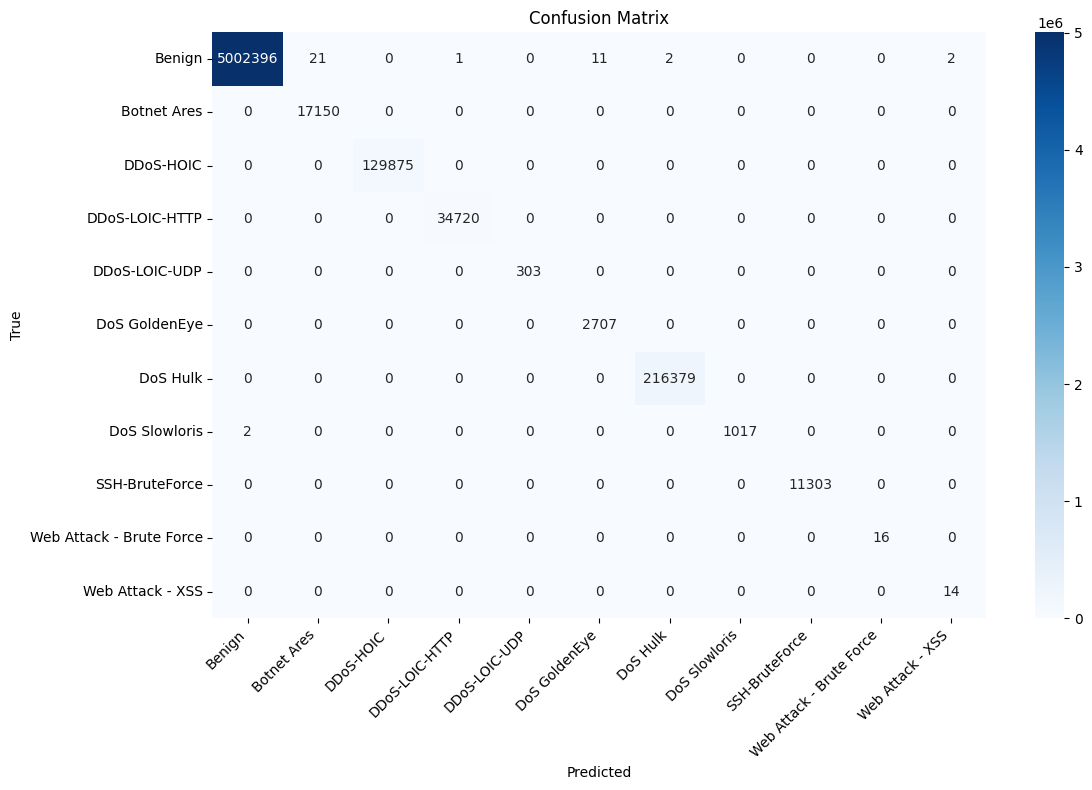

In [53]:
y_pred_numeric = le.transform(y_pred)

# ===== Step 5: Compute and Display the Confusion Matrix =====
# Compute the confusion matrix. You can use either the original string labels
# or the numeric versions as long as they are aligned.
cm = confusion_matrix(test_data["Label"], y_pred, labels=class_names)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

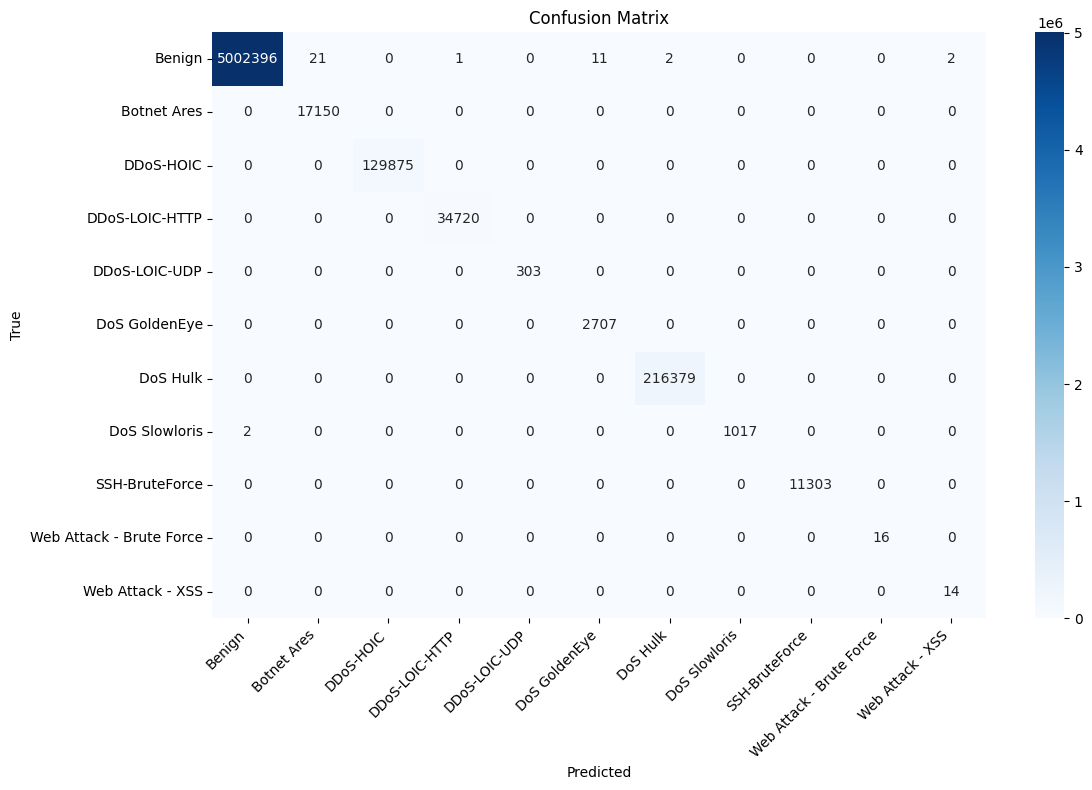

In [54]:
# Confusion Matrix Heatmap
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


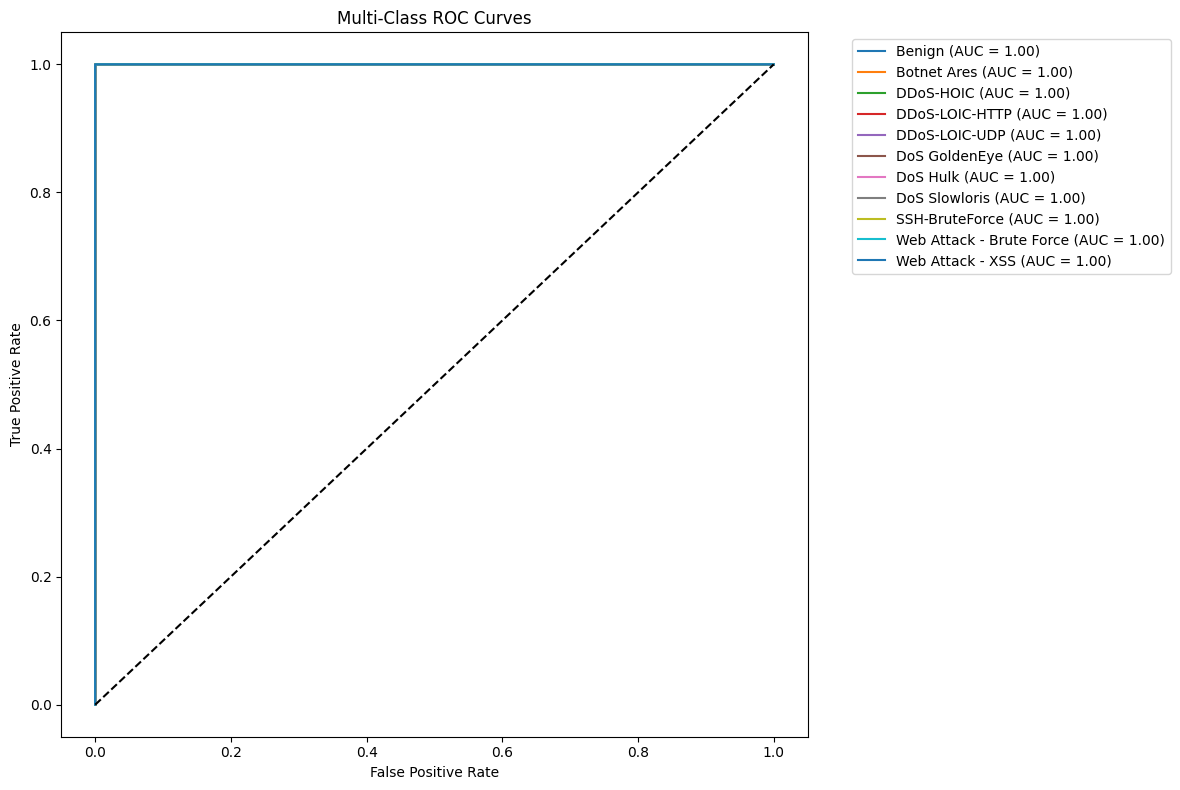

In [54]:
# ===== Step 5: Plot Multi-Class ROC Curves (One-vs-Rest) =====
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    # Create binary labels for class i: 1 when sample belongs to class i, else 0.
    y_true_binary = (y_true == i).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binary, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference.
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


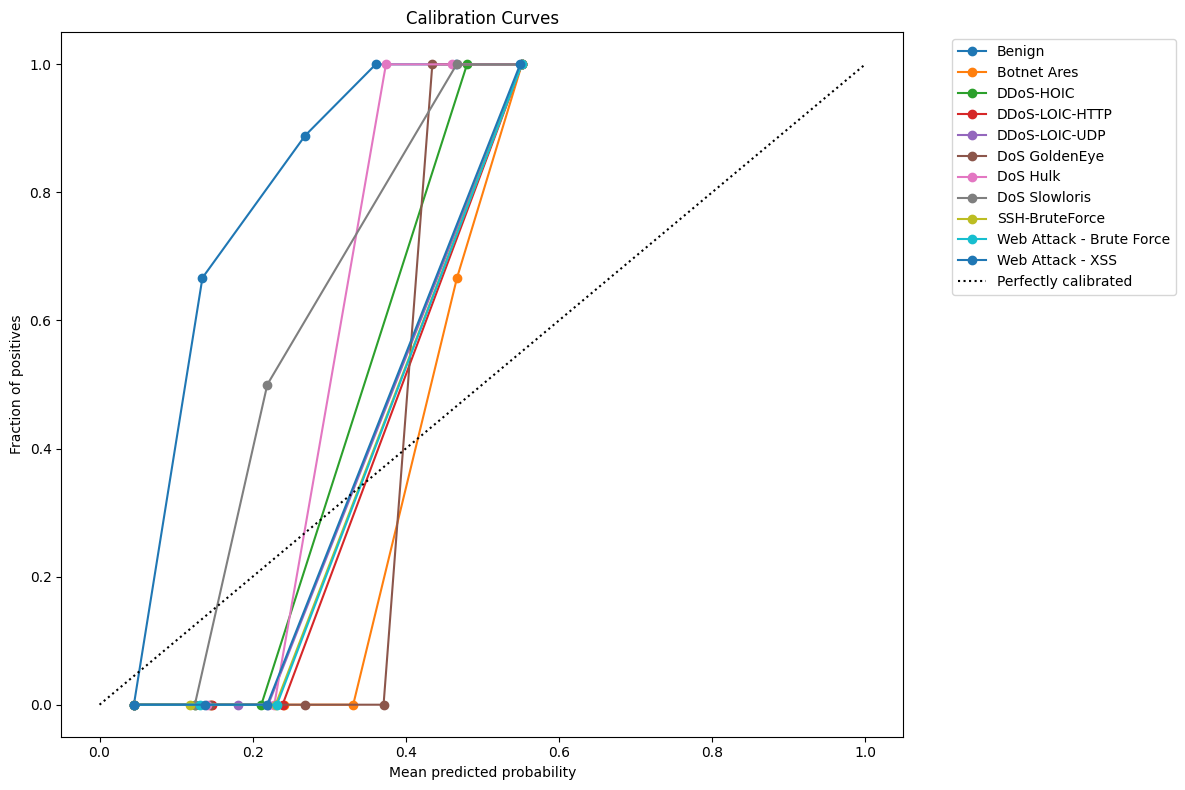

In [56]:
# =============================================================================
# Calibration Curves (One-vs-Rest for Each Class)
# =============================================================================
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    # Create a binary representation for class i.
    y_true_binary = (y_true == i).astype(int)
    prob = y_prob[:, i]
    
    # Compute calibration curve: fraction of positives vs. mean predicted probability.
    prob_true, prob_pred = calibration_curve(y_true_binary, prob, n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')
    
# Reference line for perfect calibration.
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Number of correct predictions: 5415880
Total predictions: 5415919


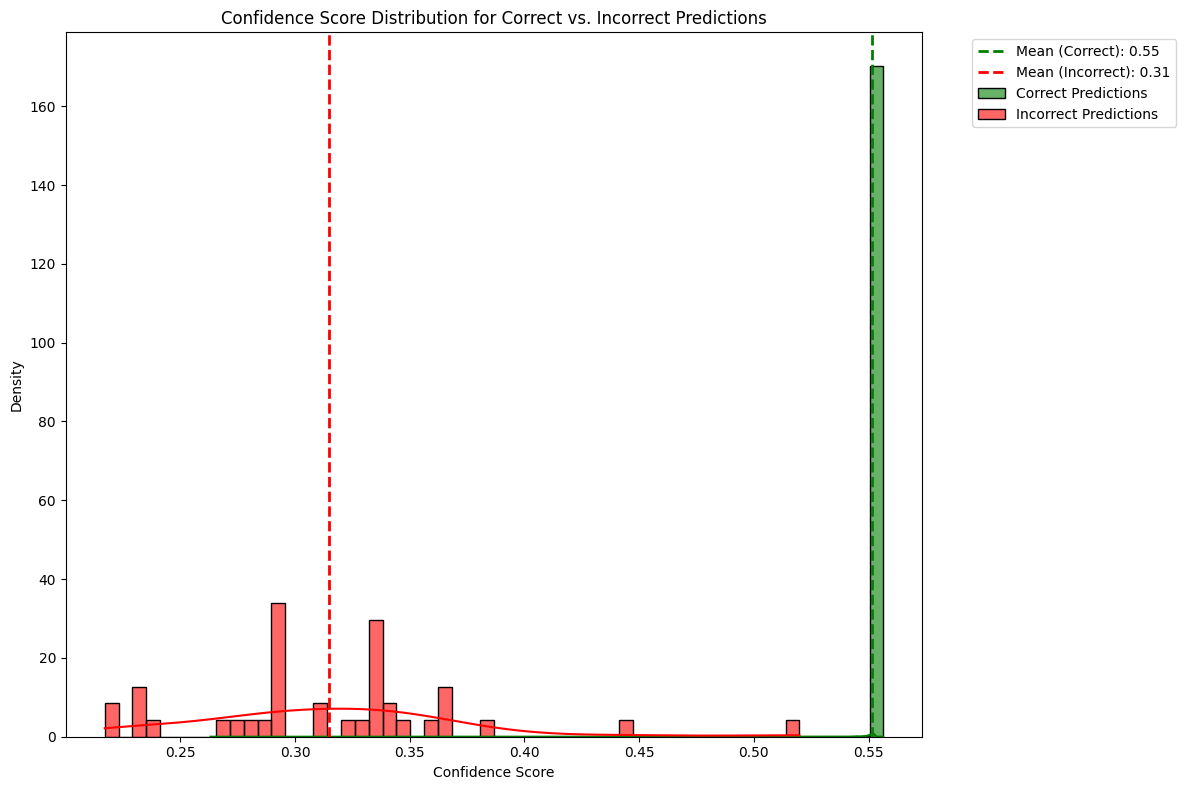

In [57]:
# Transform predicted string labels into numeric labels using the same encoder.
y_preds = le.transform(y_pred)

# ===== Compute Confidence Scores & Correctness =====
# Confidence score: maximum probability in each row.
max_probs = np.max(y_prob, axis=1)

# Create a Boolean array where each position is True if the prediction is correct.
correct = (y_preds == y_true)

# For debugging, print the number of correct predictions.
num_correct = np.sum(correct)
print("Number of correct predictions:", num_correct)
print("Total predictions:", len(y_true))

# Compute the mean confidence score for correct and incorrect predictions
mean_correct = np.mean(max_probs[correct]) if np.any(correct) else 0
mean_incorrect = np.mean(max_probs[~correct]) if np.any(~correct) else 0

# ===== Plot the Confidence Score Distribution =====
plt.figure(figsize=(12, 8))

# Plot histogram with KDE for correct predictions.
sns.histplot(max_probs[correct], bins=50, color='green', alpha=0.6, stat='density',
             kde=True, label='Correct Predictions')
# Plot histogram with KDE for incorrect predictions.
sns.histplot(max_probs[~correct], bins=50, color='red', alpha=0.6, stat='density',
             kde=True, label='Incorrect Predictions')

# Add vertical dashed lines at the mean confidence scores for each group.
plt.axvline(mean_correct, color='green', linestyle='dashed', linewidth=2,
            label=f'Mean (Correct): {mean_correct:.2f}')
plt.axvline(mean_incorrect, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean (Incorrect): {mean_incorrect:.2f}')

# Set the plot title and labels.
plt.xlabel('Confidence Score')
plt.ylabel('Density')
plt.title('Confidence Score Distribution for Correct vs. Incorrect Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

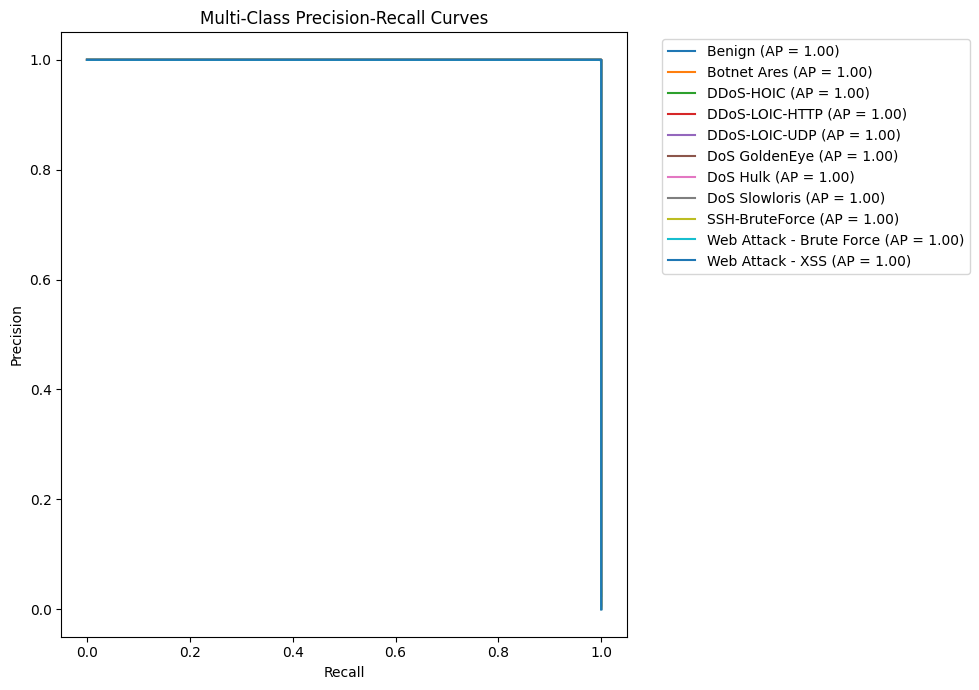

In [59]:
# ===== Step 6: Plot Multi-Class Precision-Recall Curves (One-vs-Rest) =====
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    y_true_binary = (y_true == i).astype(int)
    precision, recall, _ = precision_recall_curve(y_true_binary, y_prob[:, i])
    avg_precision = average_precision_score(y_true_binary, y_prob[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

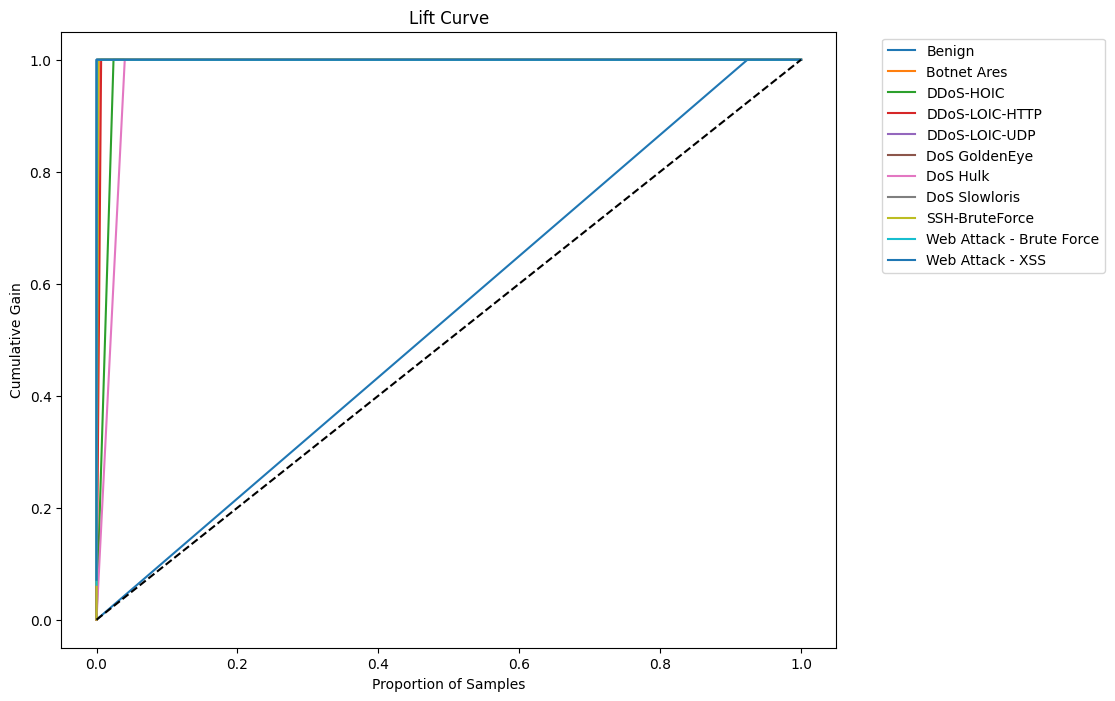

In [60]:
# Lift Curve (Gains Chart)
def plot_lift_curve(y_true, y_prob, class_names):
    """Plot Lift Curve for each class"""
    plt.figure(figsize=(10, 8))
    
    for i in range(num_classes):
        sorted_indices = np.argsort(-y_prob[:, i])  # Sort by descending probability
        cumulative_gains = np.cumsum(y_true[sorted_indices] == i) / np.sum(y_true == i)  # Gains
        
        plt.plot(np.linspace(0, 1, len(cumulative_gains)), cumulative_gains, label=f'{class_names[i]}')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Proportion of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title('Lift Curve')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call the Lift Curve function
plot_lift_curve(y_true, y_prob, class_names)

Text(0.5, 0, 'True Values')

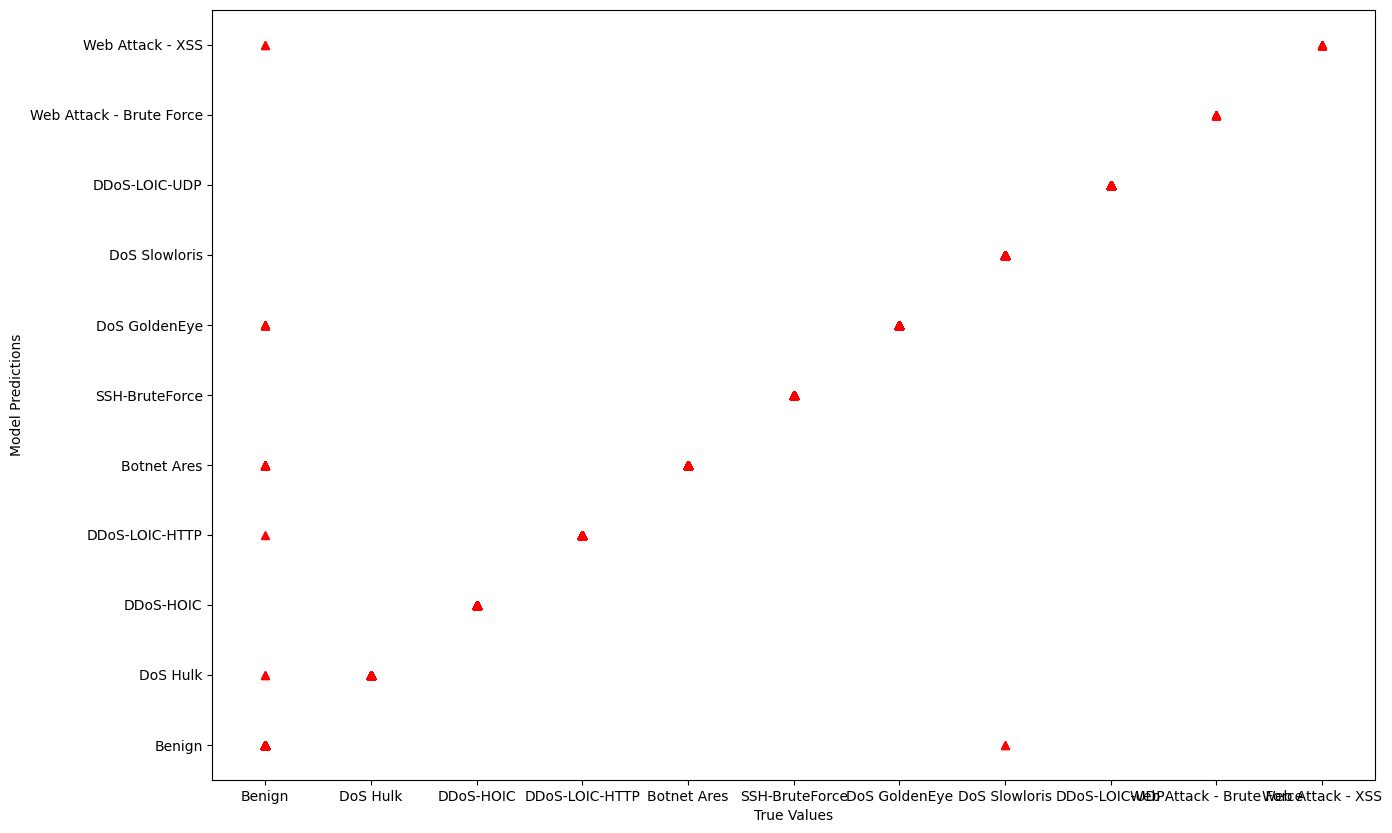

In [64]:
plt.figure(figsize = (15, 10))
plt.plot(y_true, y_pred, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')


In [65]:
# leaderboard on train data
predictor.leaderboard()

                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.999999    1616.757833   8446.840572                0.969558         440.020494            3       True         13
1       WeightedEnsemble_L2   0.999991     799.754844   2882.446628                0.945713         892.811260            2       True          9
2           CatBoost_BAG_L1   0.999962       1.042532   1811.783876                1.042532        1811.783876            1       True          8
3   RandomForestGini_BAG_L1   0.999866      63.797832     73.709132               63.797832          73.709132            1       True          6
4           LightGBM_BAG_L2   0.999865    1612.549802   7806.666116                3.039138         162.397910            2       True         12
5    NeuralNetFastAI_BAG_L2   0.999850    1623.351111  11787.351050               13.840446        4143.082844            2 

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.999999,1616.757833,8446.840572,0.969558,440.020494,3,True,13
1,WeightedEnsemble_L2,0.999991,799.754844,2882.446628,0.945713,892.811260,2,True,9
2,CatBoost_BAG_L1,0.999962,1.042532,1811.783876,1.042532,1811.783876,1,True,8
3,RandomForestGini_BAG_L1,0.999866,63.797832,73.709132,63.797832,73.709132,1,True,6
4,LightGBM_BAG_L2,0.999865,1612.549802,7806.666116,3.039138,162.397910,2,True,12
5,NeuralNetFastAI_BAG_L2,0.999850,1623.351111,11787.351050,13.840446,4143.082844,2,True,10
6,LightGBMXT_BAG_L1,0.999835,1.399373,112.591342,1.399373,112.591342,1,True,4
7,LightGBM_BAG_L1,0.999817,1.319734,99.774237,1.319734,99.774237,1,True,5
8,NeuralNetFastAI_BAG_L1,0.999815,10.959812,5478.365109,10.959812,5478.365109,1,True,3
9,RandomForestEntr_BAG_L1,0.999732,63.287710,59.299612,63.287710,59.299612,1,True,7


In [ ]:
# evaluating prediction leadership and best on test data
print("\n Performance Leaderboard:")
leaderboard_test =predictor.leaderboard(test_data, extra_metrics=['accuracy', 'acc', 'balanced_accuracy', 'mcc', 'roc_auc_ovo_macro', 'log_loss', 'nll', 'pac', 'pac_score', 'quadratic_kappa', 'precision_macro', 'precision_micro', 'precision_weighted', 'recall_macro', 'recall_micro', 'recall_weighted', 'f1_macro', 'f1_micro', 'f1_weighted'])
leaderboard_test


 Performance Leaderboard:


Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsDist_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestGini_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/RandomForestEntr_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/NeuralNetFastAI_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20250322_140124/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/a

                      model  score_test  accuracy  balanced_accuracy       mcc  roc_auc_ovo_macro  log_loss       pac  quadratic_kappa  precision_macro  precision_micro  precision_weighted  recall_macro  recall_micro  recall_weighted  f1_macro  f1_micro  f1_weighted  score_val  pred_time_test  pred_time_val      fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           LightGBM_BAG_L2    0.999999  0.999990           0.999999  0.999932           1.000000 -0.463680 -0.224530         0.999962         0.987922         0.999990            0.999990      0.999999      0.999990         0.999990  0.993581  0.999990     0.999990   0.999865     3932.138098    1612.549802   7806.666116                38.182462                3.039138         162.397910            2       True         12
1           CatBoost_BAG_L1    0.999989  0.999948           0.999989  0.999641           1.000000 -0.000594  0.998042         0.999371         0.902

,model,score_test,accuracy,balanced_accuracy,mcc,roc_auc_ovo_macro,log_loss,pac,quadratic_kappa,precision_macro,...,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,0.999999,0.999990,0.999999,0.999932,1.000000,-0.463680,-0.224530,0.999962,0.987922,...,0.999865,3932.138098,1612.549802,7806.666116,38.182462,3.039138,162.397910,2,True,12
1,CatBoost_BAG_L1,0.999989,0.999948,0.999989,0.999641,1.000000,-0.000594,0.998042,0.999371,0.902484,...,0.999962,11.719499,1.042532,1811.783876,11.719499,1.042532,1811.783876,1,True,8
2,RandomForestEntr_BAG_L1,0.999822,0.999999,0.999822,0.999996,1.000000,-0.000051,0.999830,0.999992,1.000000,...,0.999732,15.272354,63.287710,59.299612,15.272354,63.287710,59.299612,1,True,7
3,WeightedEnsemble_L3,0.999821,0.999993,0.999821,0.999950,1.000000,-0.594948,-0.479887,0.999962,0.988154,...,0.999999,3975.067190,1616.757833,8446.840572,0.473844,0.969558,440.020494,3,True,13
4,RandomForestGini_BAG_L1,0.999816,0.999999,0.999816,0.999994,1.000000,-0.000051,0.999831,0.999992,0.999994,...,0.999866,15.339144,63.797832,73.709132,15.339144,63.797832,73.709132,1,True,6
5,LightGBMXT_BAG_L1,0.999806,0.999846,0.999806,0.998934,1.000000,-1.185427,-1.291682,0.998440,0.939945,...,0.999835,16.654991,1.399373,112.591342,16.654991,1.399373,112.591342,1,True,4
6,NeuralNetFastAI_BAG_L1,0.999789,0.999962,0.999789,0.999737,1.000000,-0.000212,0.999382,0.999614,0.929990,...,0.999815,212.289522,10.959812,5478.365109,212.289522,10.959812,5478.365109,1,True,3
7,LightGBMXT_BAG_L2,0.999785,0.999977,0.999785,0.999844,1.000000,-0.746104,-0.735267,0.999679,0.907011,...,0.999729,3936.410885,1612.749137,7844.422167,42.455249,3.238473,200.153961,2,True,11
8,NeuralNetFastAI_BAG_L2,0.999732,0.999994,0.999732,0.999959,1.000000,-0.000034,0.999889,0.999951,0.998876,...,0.999850,4151.601532,1623.351111,11787.351050,257.645896,13.840446,4143.082844,2,True,10
9,WeightedEnsemble_L2,0.999726,0.999993,0.999726,0.999950,1.000000,-0.458513,-0.213776,0.999910,0.999215,...,0.999991,1845.149313,799.754844,2882.446628,0.956143,0.945713,892.811260,2,True,9


                      model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.999999    1616.757833   8446.840572                0.969558         440.020494            3       True         13
1       WeightedEnsemble_L2   0.999991     799.754844   2882.446628                0.945713         892.811260            2       True          9
2           CatBoost_BAG_L1   0.999962       1.042532   1811.783876                1.042532        1811.783876            1       True          8
3   RandomForestGini_BAG_L1   0.999866      63.797832     73.709132               63.797832          73.709132            1       True          6
4           LightGBM_BAG_L2   0.999865    1612.549802   7806.666116                3.039138         162.397910            2       True         12
5    NeuralNetFastAI_BAG_L2   0.999850    1623.351111  11787.351050               13.840446        4143.082844            2 

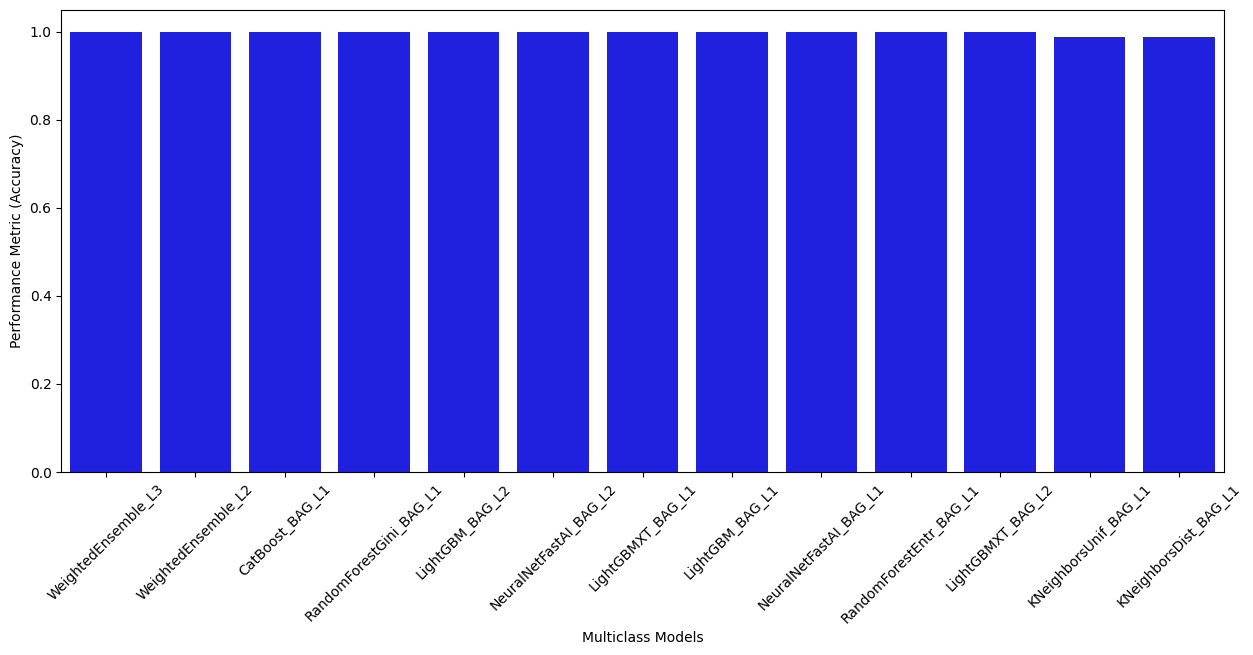

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Multiclass Models")
plt.xticks(rotation = 45);

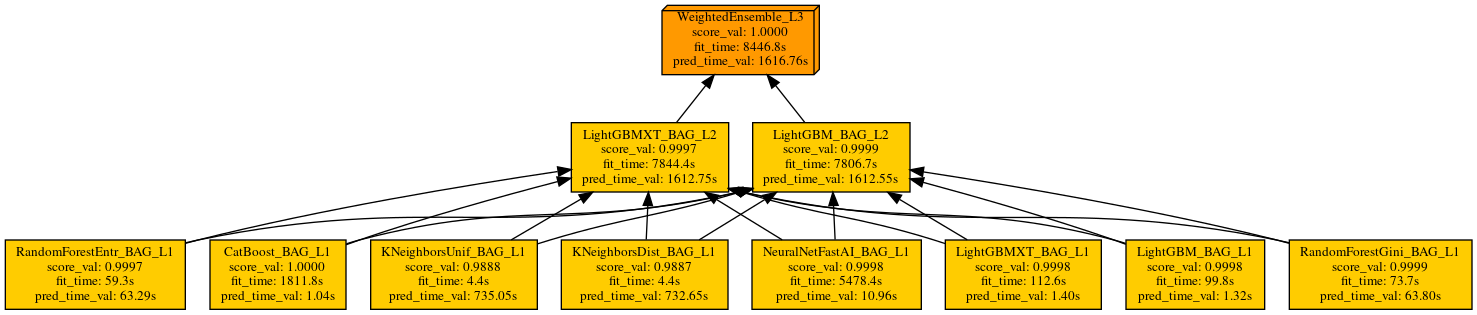

In [68]:
path_to_png = predictor.plot_ensemble_model()

from IPython.display import Image, display
display(Image(filename=path_to_png))

In [ ]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(test_data), color = "b")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Multiclass Models")
plt.xticks(rotation = 45);

Loading: AutogluonModels/ag-20250322_140124/models/KNeighborsUnif_BAG_L1/model.pkl


In [61]:
y_pred_proba

,Benign,Botnet Ares,DDoS-HOIC,DDoS-LOIC-HTTP,DDoS-LOIC-UDP,DoS GoldenEye,DoS Hulk,DoS Slowloris,SSH-BruteForce,Web Attack - Brute Force,Web Attack - XSS
0,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
1,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
2,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
3,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
4,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
...,...,...,...,...,...,...,...,...,...,...,...
5415914,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
5415915,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
5415916,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837
5415917,0.551627,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837,0.044837


In [62]:
y_pred_proba.to_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-1/autogluon/y_pred_probadf.csv", index=False)

In [63]:
y_pred.to_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-1/autogluon/y_pred.csv", index=False)

In [5]:
validation_data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
0,6,117060497,35,29,2552,6419,405,0,72.914286,83.162977,...,374939.000000,420152.949886,672032,77846,5.811635e+07,232072.445585,58280453,57952253,117060497,Benign
1,6,117268395,16,18,1005,5592,362,0,62.812500,101.487746,...,327000.000000,241901.229844,498050,155950,5.822920e+07,370398.088335,58491106,57967284,117268395,Benign
2,6,61394552,15,14,667,3391,333,0,44.466667,99.398093,...,211008.666667,346886.613892,919088,69357,1.000984e+07,37887.430890,10031069,9936831,61394552,Benign
3,6,5117283,9,8,1308,2364,436,0,145.333333,218.000000,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,5117283,Benign
4,6,1700526,8,7,1144,1581,677,0,143.000000,227.969923,...,0.000000,0.000000,0,0,0.000000e+00,0.000000,0,0,1700526,Benign


In [6]:
predictor = TabularPredictor.load("AutogluonModels/ag-20250322_140124/")

In [7]:
# evaluating prediction leadership and best on test data
print("\n Performance Leaderboard:")
leaderboard_val =predictor.leaderboard(validation_data, extra_metrics=['accuracy', 'acc', 'balanced_accuracy', 'mcc', 'roc_auc_ovo_macro', 'log_loss', 'nll', 'pac', 'pac_score', 'quadratic_kappa', 'precision_macro', 'precision_micro', 'precision_weighted', 'recall_macro', 'recall_micro', 'recall_weighted', 'f1_macro', 'f1_micro', 'f1_weighted'])
leaderboard_val


 Performance Leaderboard:
                      model  score_test  accuracy  balanced_accuracy       mcc  roc_auc_ovo_macro  log_loss       pac  quadratic_kappa  precision_macro  precision_micro  precision_weighted  recall_macro  recall_micro  recall_weighted  f1_macro  f1_micro  f1_weighted  score_val  pred_time_test  pred_time_val      fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3    0.999999  0.999991           0.999999  0.999935           1.000000 -0.594952 -0.479899         0.999930         0.965249         0.999991            0.999991      0.999999      0.999991         0.999991  0.979086  0.999991     0.999991   0.999999     3099.212543    1616.757833   8446.840572                 0.303952                0.969558         440.020494            3       True         13
1       WeightedEnsemble_L2    0.999991  0.999992           0.999991  0.999944           1.000000 -0.458500 -0.213754    

,model,score_test,accuracy,balanced_accuracy,mcc,roc_auc_ovo_macro,log_loss,pac,quadratic_kappa,precision_macro,...,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.999999,0.999991,0.999999,0.999935,1.000000,-0.594952,-0.479899,0.999930,0.965249,...,0.999999,3099.212543,1616.757833,8446.840572,0.303952,0.969558,440.020494,3,True,13
1,WeightedEnsemble_L2,0.999991,0.999992,0.999991,0.999944,1.000000,-0.458500,-0.213754,0.999908,0.998225,...,0.999991,1469.580075,799.754844,2882.446628,0.623991,0.945713,892.811260,2,True,9
2,CatBoost_BAG_L1,0.999962,0.999946,0.999962,0.999625,1.000000,-0.000603,0.998012,0.999326,0.893256,...,0.999962,71.929680,1.042532,1811.783876,71.929680,1.042532,1811.783876,1,True,8
3,RandomForestGini_BAG_L1,0.999866,0.999999,0.999866,0.999994,1.000000,-0.000052,0.999830,0.999993,0.999109,...,0.999866,15.803176,63.797832,73.709132,15.803176,63.797832,73.709132,1,True,6
4,LightGBM_BAG_L2,0.999865,0.999989,0.999865,0.999927,1.000000,-0.463683,-0.224540,0.999960,0.988895,...,0.999865,3067.913208,1612.549802,7806.666116,27.665724,3.039138,162.397910,2,True,12
5,NeuralNetFastAI_BAG_L2,0.999850,0.999993,0.999850,0.999950,1.000000,-0.000033,0.999891,0.999967,0.997634,...,0.999850,3217.226487,1623.351111,11787.351050,176.979004,13.840446,4143.082844,2,True,10
6,LightGBMXT_BAG_L1,0.999835,0.999843,0.999835,0.998916,1.000000,-1.185394,-1.291655,0.998398,0.928903,...,0.999835,14.073534,1.399373,112.591342,14.073534,1.399373,112.591342,1,True,4
7,LightGBM_BAG_L1,0.999817,0.999928,0.999817,0.999504,1.000000,-1.031944,-1.124369,0.999024,0.893414,...,0.999817,11.753586,1.319734,99.774237,11.753586,1.319734,99.774237,1,True,5
8,NeuralNetFastAI_BAG_L1,0.999815,0.999960,0.999815,0.999722,1.000000,-0.000273,0.999271,0.999618,0.945300,...,0.999815,185.754315,10.959812,5478.365109,185.754315,10.959812,5478.365109,1,True,3
9,RandomForestEntr_BAG_L1,0.999732,0.999999,0.999732,0.999994,1.000000,-0.000051,0.999831,0.999990,0.999552,...,0.999732,12.913945,63.287710,59.299612,12.913945,63.287710,59.299612,1,True,7


## Computing additional Metrics

In [7]:
y_pred_proba = pd.read_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-1/autogluon/y_pred_probadf.csv", header=0)

In [8]:
y_pred = pd.read_csv(f"s3://final-praxis/automl-output/final-project/inference-results/output/subset-1/autogluon/y_pred.csv")

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    precision_recall_fscore_support, log_loss, brier_score_loss,
    balanced_accuracy_score
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder

In [10]:
# Log Loss calculation
logloss = log_loss(y_true, y_pred_proba)
print(f"Log Loss: {logloss:.7f}")

Log Loss: 0.5949483


In [11]:
# Matthews Correlation Coefficient (MCC) calculation
mcc = matthews_corrcoef(y_true, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.7f}")

Matthews Correlation Coefficient (MCC): 0.9999502


In [12]:
# Compute micro-averaged F1 score
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"Micro-averaged F1 score: {f1_micro:.7f}")
print(f"F1 Macro: {f1_macro:.7f}")
print(f"F1 Weighted: {f1_weighted:.7f}")

Micro-averaged F1 score: 0.9999928
F1 Macro: 0.9936081
F1 Weighted: 0.9999928


In [13]:
# Compute Recall metrics
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_macro = recall_score(y_true, y_pred, average='macro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')

print(f"Recall Micro: {recall_micro:.7f}")
print(f"Recall Macro: {recall_macro:.7f}")
print(f"Recall Weighted: {recall_weighted:.7f}")

Recall Micro: 0.9999928
Recall Macro: 0.9998209
Recall Weighted: 0.9999928


In [15]:
# Compute metrics
precision_micro = precision_score(y_true, y_pred, average='micro')
precision_macro = precision_score(y_true, y_pred, average='macro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')

# Output results
print(f"Precision Micro: {precision_micro:.7f}")
print(f"Precision Macro: {precision_macro:.7f}")
print(f"Precision Weighted: {precision_weighted:.7f}")

Precision Micro: 0.9999928
Precision Macro: 0.9881538
Precision Weighted: 0.9999929


In [16]:
# Compute AUC Scores
auc_micro = roc_auc_score(y_true, y_pred_proba, average='micro', multi_class='ovr')
auc_macro = roc_auc_score(y_true, y_pred_proba, average='macro', multi_class='ovr')
auc_weighted = roc_auc_score(y_true, y_pred_proba, average='weighted', multi_class='ovr')

print(f"AUC Micro: {auc_micro:.7f}")
print(f"AUC Macro: {auc_macro:.7f}")
print(f"AUC Weighted: {auc_weighted:.7f}")

AUC Micro: 1.0000000
AUC Macro: 1.0000000
AUC Weighted: 1.0000000
